# EDA краудфандинговой платформы kiva.org

## **0. Описание**

<img src='https://uploads-ssl.webflow.com/6005cb85ea23452ddd9e5ac6/603005d11044eb560357c563_kiva_logo_tag_0.png' width=250, heigth=100>



*Девиз Kiva: "loans that change lives" (кредиты, которые меняют жизнь)*

**Контекст проекта**

Краудфандинговая платформа kiva.org ставит своей целью предоставление финансовых услуг наиболее нуждающимся и необеспеченным людям. Заёмщики оставляют заявку на сайте, доноры поддерживают её  финансово, на месте партнёр организации выдаёт кредит, который погашается из этих средств, которые донорам возвращаются уже заёмщиками через платформу.

Kiva основана в 2005 году в Сан-Франциско.

Представленный компанией датасет за 2014-2017гг. содержит информацию о займах на различные проекты в 85 разных странах.


Проект призван найти взаимосвязи характеристик со скоростью набора средств, а также мы исследуем связана ли доля заёмщиков-женщин с основной религией.

Выделим локальных финансовых партнёров, которые доверяют платформе и выдают кредиты до того, как собраны средства на их возмещение.

Проанализируем как зависит сектор заявки от индекса бедности страны
 и в каких странах Kiva недостаточно представлена.

**Цели исследования**

1. Выявить от каких  характеристик зависит скорость набора средств на заявку (разница между временем, когда заявка опублирована на сайте и средства на неё собраны)
2. Анализ заявок и индекса бедности, дать рекомендации о тех странах, на которые Kiva стоит обратить внимание.
3. Общее EDA: Проанализировать пол заемщиков, доля заёмщиков-женщин в разрезе основной религии, активность Kiva и заявителей в разрезе стран, частота полного финансирования.
4. Сформировать и проверить гипотезы и равенстве средних по заёмщикам-женщинам

**Ход исследования**

Моё исследование пройдет в несколько этапов:
* Очистка и подготовка данных:
  * Первичное знакомство с датасетом: изучим распределение данных и сводную статистику.
  * Обработаем данные, оценим наличие пропусков, дубликатов и выбросов
  * Преобразуем столбцы в подходящие типы данных (например, datetime).
<br><br>

* Скорость анализа сбора средств:
  * Рассчитаем время, которое было затрачено на сбор средств по каждой заявке
  * Проанализируем распределение времени сбора средств с помощью описательной статистики и визуализаций, в том числе в разрезе имеющихся в датасете категорий.
  * Определим факторы, которые могут повлиять на скорость сбора средств, такие как сумма кредита, сектор, деятельность, партнер или страна.
  * Проведем статистический тест, чтобы подтвердить ваши выводы<br><br>

* Анализ заявок и индекса бедности:
  * Аггрегируем данные по заявкам в разрезе стран, сохраняя информацию о средних и суммарных показателях (необходимо будет определить для характеристик, какой вид аггрегации к ним подходит)
  * Объединим данные индекса бедности по странам с получившимся набором данных Kiva.
  * Проанализируем взаимосвязь между темой заявки (столбец activity или sector) и индексом бедности страны.
  * Определим сектора и темы заявок, которые более распространены в странах с более высокими индексами бедности.
  * Оценим представленность заявок из бедных стран в наборе кредитных данных Kiva, определите страны, в которых Kiva недопредставлена, на основе частоты выдачи кредитов.<br><br>


* Распределем женщин-заемщиков в разных странах и религиях:
  * Построим визуализации, которые будут показывать как связана основная религия и доли женщин-заёмщиков
  <br><br>

* Партнёрские отношения Kiva в регионах
  * На основе столбца partner_id изучим количество партнёров Kiva в разных странах; равномерность распределения сумм кредитов среди партнёров; частоту и объем случаев, когда партнеры выдают кредиты до полного финансирования
  * Визуализируем результаты с помощью диаграмм или графиков<br><br>

* Проверка гипотез
  * Напишу фунции для проверки
  * Сформирую гипотезы о равенстве средних, посмотрю распределение, выберу тест, проведу тест и напишу выводы

* При анализе заявок и индекса бедности можно обогатить аггрегированную по странам таблицу данными о численности населения, чтобы углубить исследование и выводы.

### **Описание данных**

**Описание данных**
Датасет kiva.csv с исполненными заявками за 2014-2017гг.

- id —  идентификатор заявки-кредита;
- funded_amount - сумма сбора (выдается агенту, USD);
- loan_amount - сумма запрашиваемого займа (от агента заемщику, USD) (loan_amount=funded_amount)
- activity - подсектор применения
- sector - сектор применения
- use - назначение-описание использования
- country_code - ISO-код страны страны, в которой выдан кредит
- country - название страны, в которой выдан кредит
- region - регион в стране
- currency - местная валюта (не интересует)
- partner_id - номер партнера, выдающий кредит
- posted_time - время публикации заявки на сайте
- disbursed_time - время предоставления кредита
- funded_time - время когда собрали денежные средства (может быть раньше даты заявки)
- term_in_months - срок в месяцах, на который был выдан кредит
- lender_count -кол-во кредиторов
- tags - тэги по сайту
- borrower_genders - пол заемщика(ов)
- repayment_interval - регулярность выплат:
    * bullet - единовременное погашение
    * weekly - еженедельно
    * monthly -ежемесячно
    * irregular - нерегулярно
- date - дата (в формате гггг-мм-дд) (предположительно = posted_time)
- main_country_religion - главная религия страны:
    * Christians - христиане
    * Muslims - мусульмане
    * Buddhists - буддисты
    * Hindus - индусы
    * Folk Religions - народные религии
    * Jews - евреи
    * Unaffiliated -неаффилированные

## **1. Загрузка данных**

### 1.1 Импортируем библиотеки, откроем файл *.csv

In [1]:
# библиотеки для работы с табличными данными
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
# magic function, отображает фигуру в блокноте рядом с кодом:
%matplotlib inline
# matplotlib/plot, графики с высоким разрешением:
%config InlineBackend.figure_format='retina'

import seaborn as sns
# применяем стиль whitegrid
sns.set_style('whitegrid')

import plotly.express as px
from plotly import graph_objects as go
# (!) для отображения интерактивных графиков plotly как картинок на github:
# для интерактивности лучше смотреть локально без этих параметров
!pip install -U kaleido==0.2.1 #post1
import kaleido
import plotly.io as pio
pio.renderers.default = "png"

!pip install squarify
import squarify

from datetime import datetime

from scipy import stats as st
from scipy.stats import mannwhitneyu

# уберем предупреждения
import warnings
warnings.filterwarnings("ignore")

#!pip install wordcloud
# библиотека облака слов
from wordcloud import WordCloud
# модуль для подсчета повторений
from collections import Counter

ERROR: Invalid requirement: '#post1'

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**MPI (Multidimensional Poverty Index) - это глобальный индекс многомерной бедности.**

Использует показатели здоровья, образования и уровня жизни для определения
распространенности и интенсивности бедности, с которой сталкивается население. Он заменил индекс бедности.
Чем больше индекс, тем беднее страна.
<img src='https://hdr.undp.org/sites/default/files/styles/original/public/images/2022-03/mpiRoadMap.png?itok=85ASETTg' width=800, heigth=250>


In [2]:
# словарь Страна - Индекс бедности MPI
mpi_index = {
 'Afghanistan':0.27172124, 'Albania':0.00274788, 'Algeria':0.0054091, 'Angola':0.28243506, 'Argentina':0.0014693,
 'Armenia':0.000690069007857107, 'Azerbaijan':0.021,'Bangladesh':0.1040603, 'Belize':0.01710883, 'Benin':0.36767483,
 'Bolivia':0.0377543, 'Botswana':0.0726387, 'Burundi':0.408861094240289,
 'Cameroon':0.2320601, 'Central African Republic':0.4613475, 'Chad':0.5170112, 'Chile':0.207, 'Colombia':0.01965727,
 'Congo':0.3311887, 'Costa Rica':0.0020063, 'Cote D\'Ivoire':0.235871,
 'Cuba':0.0026887, 'Dominican Republic':0.0087862, 'Ecuador':0.0079374, 'Ethiopia':0.3666042, 'Gambia':0.1980231,
 'Georgia':0.0012446, 'Ghana':0.1112183, 'Guinea':0.3732216, 'Guinea-Bissau':0.3406887, 'Guyana':0.0065924,
 'Haiti':0.1995877, 'Honduras':0.0511542, 'India':0.0688106, 'Indonesia':0.0140107, 'Iraq':0.03269432,
 'Israel':None,'Jamaica':0.0108103, 'Jordan':0.00152592, 'Kiribati':0.0801574, 'Kyrgyzstan':0.001426,
 'Lao People\'s Democratic Republic':0.10833325, 'Lebanon':0.531,'Lesotho':0.0843592, 'Liberia':0.2592937, 'Madagascar':0.3839745,
 'Malawi':0.2310952, 'Maldives':0.00265409, 'Mali':0.3760629, 'Mauritania':0.3270372, 'Mexico':0.0280538,
 'Mongolia':0.0281268, 'Montenegro':0.0048989, 'Morocco':0.0266967, 'Myanmar (Burma)':0.17584623, 'Nepal':0.0743989,
 'Nigeria':0.2543896, 'North Macedonia':0.0014221, 'Pakistan':0.1982474, 'Palestine':0.0019801, 'Panama':0.191,
 'Papua New Guinea':0.2632909, 'Paraguay':0.01884858, 'Peru':0.0292211, 'Philippines':0.02424934, 'Rwanda':0.231002,
 'Samoa':0.0246005, 'Sao Tome and Principe':0.0479234, 'Senegal':0.262862, 'Serbia':0.0004331, 'Seychelles':0.0029635,
 'Sierra Leone':0.2928993, 'Somalia':0.514,'South Africa':0.02489064, 'Sri Lanka':0.0111847, 'Suriname':0.0112325,
 'Tajikistan':0.02900592, 'Tanzania':0.284179310669258, 'Thailand':0.0021207, 'Timor-Leste':0.221514240070676,
 'Togo':0.1796163, 'Tonga':0.0033362, 'Tunisia':0.0028877, 'Turkmenistan':0.0008492, 'Turkey':0.028,
 'Tuvalu':0.0080846, 'Uganda':0.281028478426768, 'Vietnam':0.0077294, 'Zambia':0.2316851, 'Zimbabwe':0.1099418,
 'Barbados':0.00852886, 'Bhutan':0.17486399, 'Bosnia and Herzegovina':0.0083075, 'Brazil':0.01634604,
 'Burkina Faso':0.523424279357662, 'Cambodia':0.17034812, 'China':0.0160667, 'Comoros':0.18077141,
 'The Democratic Republic of the Congo':0.1116763,
 'Egypt':0.0196817970481763, 'El Salvador':0.03246251, 'Eswatini (Kingdom of)':0.08127132, 'Gabon':0.0696953622816103,
 'Guatemala':0.13351782, 'Kazakhstan':0.00161063266199911, 'Kenya':0.170776074964141, 'Libya':0.00742146512493491,
 'Moldova':0.00353391, 'Mozambique':0.416955412151251, 'Namibia':0.184734534885262,
 'Nicaragua':0.0744948916698962, 'Niger':0.601279812220296, 'Saint Lucia':0.00720186, 'South Sudan':0.58015746,
 'Sudan':0.2794396, 'Trinidad and Tobago':0.00241792, 'Vanuatu':0.129,'Ukraine':0.000840431758839254,
 'Yemen':0.245166461457986 }

In [3]:
# откроем файл *.csv
# 1. kiva
# 2. население стран с вики + пара стран добита вручную отсюда
# https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population
try:
    try:
        df = pd.read_csv('kiva.zip', low_memory=False)
        population = pd.read_excel('population.xlsx')
    except:
        df = pd.read_csv('/datasets/kiva.zip', low_memory=False)
        population = pd.read_excel('/datasets/population.xlsx')
except:
    from google.colab import drive
    drive.mount('/content/drive')
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/15_masterskaya_kiva/kiva.zip', low_memory=False)
    population = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/15_masterskaya_kiva/population.xlsx')

# альтернативная приставка на я.диск
# df = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/RTWuCdqaqU30yQ')
# population = pd.read_excel('https://drive.google.com/uc?export=download&id=1_SebfxQ1zQmVXCBS6ujDFbf3zJDDcQpb')

Столбец с кол-вом населения будем использовать в п.3.2.1

In [4]:
# настройка чтобы выводил все столбцы
pd.set_option('display.max_columns', None)

### 1.2 Исследуем дф

In [5]:
def lookup(df:pd.DataFrame) -> None:
    '''Функция для получения базовой информации о датафрейме'''
    print('Dataset shape',df.shape,"example:")
    display(df.dropna().sample().T) # удал пропуски, возвращаем случайную строку, транспонируем
    for col in df.columns:
        n = df[col].nunique()
        if n < 15:
            display(df[col].value_counts(dropna=False).to_frame().T.style.format("{:_.0f}"))
        elif np.issubdtype(df[col].dtype, np.number):
            print(f"{col} — {n} values. MIN {df[col].min():_.0f}, AVG: {df[col].mean():_.1f}, MAX: {df[col].max():_.0f}")
        else:
            print(f"{col} — {n} values. MIN {df[col].dropna().min()}, MAX: {df[col].dropna().max()}")

In [6]:
# посмотрим общую информацию о дф
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622633 entries, 0 to 622632
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     622633 non-null  int64  
 1   funded_amount          622633 non-null  float64
 2   loan_amount            622633 non-null  float64
 3   activity               622633 non-null  object 
 4   sector                 622633 non-null  object 
 5   use                    619310 non-null  object 
 6   country_code           622625 non-null  object 
 7   country                622633 non-null  object 
 8   region                 574127 non-null  object 
 9   currency               622633 non-null  object 
 10  partner_id             611522 non-null  float64
 11  posted_time            622633 non-null  object 
 12  disbursed_time         622633 non-null  object 
 13  funded_time            622633 non-null  object 
 14  term_in_months         622633 non-nu

In [7]:
# исследуем датасет
lookup(df)

Dataset shape (622633, 21) example:


,440601
id,1132852
funded_amount,300.0
loan_amount,300.0
activity,Farming
sector,Agriculture
use,To buy organic fertilizer for the farm.
country_code,PH
country,Philippines
region,Gala Ozamiz City
currency,PHP


id — 622633 values. MIN 653_047, AVG: 990_100.5, MAX: 1_340_316
funded_amount — 475 values. MIN 25, AVG: 798.3, MAX: 100_000
loan_amount — 475 values. MIN 25, AVG: 798.3, MAX: 100_000
activity — 163 values. MIN Adult Care, MAX: Wholesale
sector — 15 values. MIN Agriculture, MAX: Wholesale
use — 391213 values. MITo buy chicken., MAX: ” provide a safer and more secure living environment for his family by allowing him to purchase new windows for his home through an affordable loan.
country_code — 84 values. MIN AF, MAX: ZW
country — 85 values. MIN Afghanistan, MAX: Zimbabwe
region — 12359 values. MIN "The first May" village, MAX: İZMİT
currency — 67 values. MIN ALL, MAX: ZWD
partner_id — 363 values. MIN 9, AVG: 178.5, MAX: 535
posted_time — 619611 values. MIN 2014-01-01 04:49:26+00:00, MAX: 2017-07-25 06:14:08+00:00
disbursed_time — 5698 values. MIN 2013-12-02 08:00:00+00:00, MAX: 2017-09-28 07:00:00+00:00
funded_time — 497853 values. MIN 2014-01-01 12:18:55+00:00, MAX: 2017-07-26 02:09:4

,monthly,irregular,bullet,weekly
repayment_interval,311_560,250_376,60_095,602


date — 1296 values. MIN 2014-01-01, MAX: 2017-07-25


,Christians,Muslims,Buddhists,Hindus,Folk Religions,Jews,Unaffiliated
main_country_religion,463_343,99_881,37_578,11_628,9_880,190,133


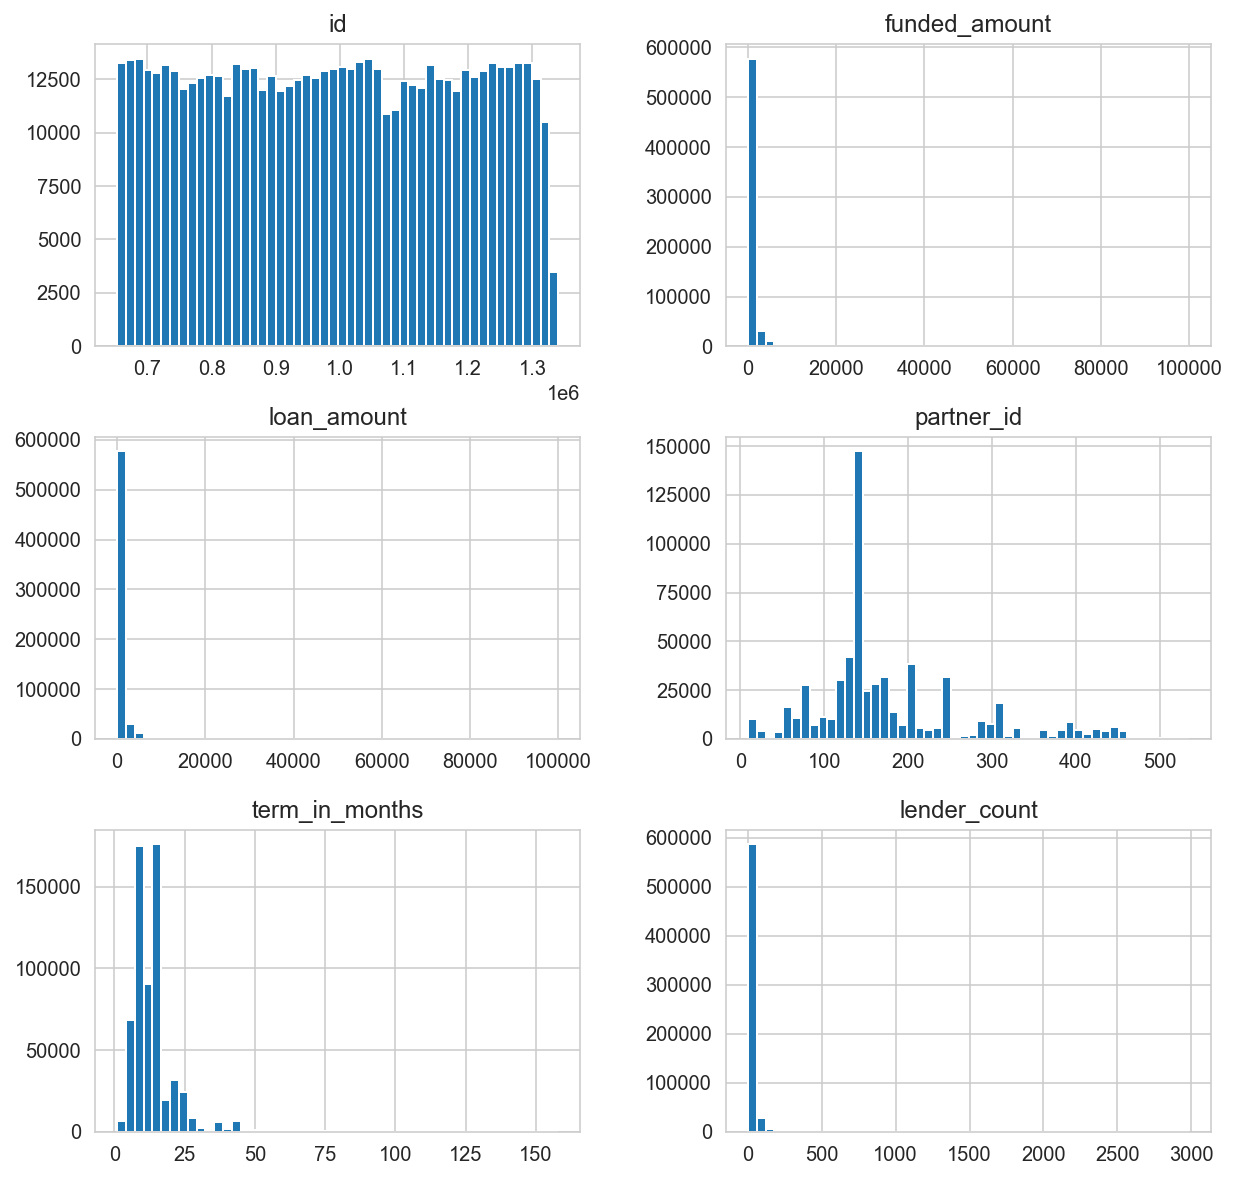

In [92]:
# построим гистограммы по всем числовым столбцам, чтобы сразу посмостеть выбросы
df.hist(bins=50, figsize=(10,10));

По распределению подавляющее большинство Займов на небольшие суммы, но есть редкие суммы большие и видимо там больше кол-во lender_count(кол-во кредиторов).

## **2. Очистка и подготовка данных**

### 2.1 Преобразуем типы данных

In [9]:
# создадим копию исходного дф и поработаем с ним
df1 = df.copy()

In [10]:
# partner_id ни с чем не коррелирует, оставляем тип данных и пропуски

In [11]:
# переведем даты в тип даты
df1[['posted_time', 'disbursed_time', 'funded_time']] = \
     df1[['posted_time', 'disbursed_time', 'funded_time']].astype('datetime64[ns]')

In [12]:
# date -дата (в формате гггг-мм-дд) (предположительно = posted_time)
# не обозначено, можно удалить
df1.drop(columns=['date'], inplace=True)

In [13]:
# Проверим что loan_amount = funded_amount, просуммируем там где не совпадает
(df['loan_amount'] != df['funded_amount']).sum()

0

In [14]:
# loan_amount = funded_amount, поэтому один столбец можно удалить
df1.drop(columns=['loan_amount'], inplace=True)

In [15]:
# проверим float term_in_months является ли все строки целыми числами
for i in range(len(df1)):
    if pd.isna((df1['term_in_months'][i])):
        pass
    elif int(df1['term_in_months'][i]) == df1['term_in_months'][i]:
        pass
    else:
        print(False)

In [16]:
# можно перевести в целые числа
df1['term_in_months'] = df1['term_in_months'].astype(int)

### 2.2 Оценка пропусков, заполнение

In [17]:
# проверим кол-во пропусков
((pd.concat([df1.isna().sum(),
             df1.isna().mean()],
             axis=1,
             keys=['nan_count', 'nan_share_%']))
 .sort_values(by='nan_count', ascending=False)
 .style.background_gradient('Oranges')
 .format({'nan_share_%':'{:.2%}'})
)

,nan_count,nan_share_%
tags,167915,26.97%
region,48506,7.79%
partner_id,11111,1.78%
use,3323,0.53%
borrower_genders,3318,0.53%
country_code,8,0.00%
disbursed_time,0,0.00%
repayment_interval,0,0.00%
lender_count,0,0.00%
term_in_months,0,0.00%


Очень много пропусков в тегах, но они сильно нам не нужны. Есть много пропусков в Регионе (возможно в некоторых странах нет регионов или они не знают названия)

In [18]:
# заполним пустые значения Регионы 'NO_DATA'
df1['region'] = df1['region'].fillna('NO_DATA')

# заполнимпустые значения borrower_genders пол заемщика(ов) 'NO_DATA'
df1['borrower_genders'] = df1['borrower_genders'].fillna('NO_DATA')

# заполнимпустые значения use - назначение-описание использования 'NO_DATA'
df1['use'] = df1['use'].fillna('NO_DATA')

In [19]:
# зададим Намибии код страны
df1.loc[df1['country']== 'Namibia', 'country_code'] = \
  df1.loc[df1['country']== 'Namibia', 'country_code'].fillna('NA')  # Namibia NA

### 2.3 Изучим дубликаты в датафрейме

In [20]:
# проверим явные дубликаты всех строк
display(df1.duplicated().sum())

0

### 2.4 Изучим категориальные и количественные значения

In [21]:
# Выведем списки уник.знач. всех колонок для понимания как лучше обработать данные.
# *Возможно для кого-то это излишне, но мне проще погрузиться и понять пролистав
# уникальные значения, больше упор на категориальные чтобы понять как их
# обрабатывать реплейсами теги и прочее
if False: # для просмотра поменять False на True
    for col in df1.columns:
        display(df1[col].sort_values().unique())

- страны можно сгруппировать по регионам
- по region бардак, кто как называет
- borrower_genders - пол заемщика(ов): надо посчитать кол-во м/ж

### 2.5 Добавим новые столбцы

In [22]:
# добавим столбец с регионом для стран
# создадим списки регионов/суб-регионов по таблице
# https://en.wikipedia.org/wiki/List_of_countries_by_the_United_Nations_geoscheme

Northern_Africa = ['Egypt']
Sub_Saharan_Africa = ['Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Congo',\
                      "Cote D'Ivoire", 'Ghana', 'Lesotho', 'Liberia', 'Madagascar',\
                      'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia',\
                      'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia',\
                      'South Africa', 'South Sudan', 'Tanzania',\
                      'The Democratic Republic of the Congo', 'Togo', 'Uganda',\
                      'Zambia', 'Zimbabwe', 'Niger']
Latin_America_and_the_Caribbean = ['Belize', 'Bolivia', 'Brazil', 'Chile',\
                                   'Colombia', 'Costa Rica', 'Dominican Republic',\
                                   'Ecuador', 'El Salvador', 'Guatemala', 'Haiti',\
                                   'Honduras', 'Kenya', 'Mexico', 'Nicaragua',\
                                   'Panama', 'Paraguay', 'Peru', 'Puerto Rico',\
                                   'Saint Vincent and the Grenadines', 'Suriname']
Northern_America = ['United States']
Europe = ['Kosovo', 'Ukraine', 'Albania', 'Moldova']
Asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bhutan', 'Cambodia', 'China',\
        'Georgia', 'India', 'Indonesia', 'Iraq', 'Israel', 'Jordan', 'Kyrgyzstan',\
        "Lao People's Democratic Republic", 'Lebanon', 'Mongolia',\
        'Myanmar (Burma)', 'Nepal', 'Pakistan', 'Palestine', 'Philippines',\
        'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Vietnam', 'Yemen']
Oceania = ['Samoa', 'Solomon Islands', 'Vanuatu']

# функция создания суб-региона для стран
def sub_region(row):
    if row in Northern_Africa:
        return 'Northern Africa'
    elif row in Sub_Saharan_Africa:
        return 'Sub-Saharan Africa'
    elif row in Latin_America_and_the_Caribbean:
        return 'Latin America and the Caribbean'
    elif row in Northern_America:
        return 'Northern America'
    elif row in Europe:
        return 'Europe'
    elif row in Asia:
        return 'Asia'
    elif row in Oceania:
        return 'Oceania'
    else:
        return 'NO_DATA/ERROR'

# создадим столбец функцией
df1['sub_region_continent'] = df1['country'].apply(sub_region)
df1['sub_region_continent'].unique() # проверка

array(['Asia', 'Latin America and the Caribbean', 'Sub-Saharan Africa',
       'Northern America', 'Europe', 'Oceania', 'Northern Africa'],
      dtype=object)

In [23]:
# добавим столбец возьмем 1ый тег по каждой строчке
# isinstance - проверка является ли row строчкой, или там NaN-float
df1['tag_first'] = df1['tags'].apply(lambda row: row.split(',')[0]\
                                     if isinstance(row, str) else row)
# удалим хэштеги
df1['tag_first'] = df1['tag_first'].apply(lambda row: row.replace('#', '')\
                                     if isinstance(row, str) else row)

In [24]:
# из borrower_genders (пол заемщика(ов)) посчитаем кол-во мужчин и кол-во женщин
df1['male'] = df1['borrower_genders'].str.count('male')\
  -df['borrower_genders'].str.count('female')
df1['female'] = df1['borrower_genders'].str.count('female')
# и общее кол-во заемщиков
df1['male_female'] = df1['borrower_genders'].str.count('male')

In [25]:
# добавим индекс бедности страны
# Сделаем дф из словаря индексов бедности
df_mpi_index = pd.DataFrame.from_dict(mpi_index, orient = 'index').reset_index()
df_mpi_index.columns = ['country', 'mpi_index']

# соединим с основным датасетом
if 'mpi_index' in df1.columns:
    pass
else:
    # df1 = df1.merge(df_mpi_index, on='country', how='left', right_index=False)
    df1['mpi_index'] = df1.country.map(mpi_index) # вариант попроще

In [26]:
# проверим
df1.head(1)

,id,funded_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,main_country_religion,sub_region_continent,tag_first,male,female,male_female,mpi_index
0,653051,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39,2013-12-17 08:00:00,2014-01-02 10:06:32,12,12,NaN,female,irregular,Muslims,Asia,NaN,0.0,1,1,0.198247


In [27]:
# добавим столбец time_collect -время сбора займа средств в днях
# (дата когда собрали средства - дата публикации заявки на сайте)
df1['time_collect'] = (df1['funded_time'] - df1['posted_time']).dt.days

### 2.6 Выводы Предобработки данных:

- Преобразованы типы данных posted_time, disbursed_time, funded_time в datetime
- Столбец date удален
- Преобразован term_in_months в целые числа
- Пропуски это тоже статистика. Заполнены пропуски значением 'NO_DATA' у столбцов region, borrower_genders.
- Namibia добавлен код региона
- Добавлены столбцы: sub_region_continent (суб-регион/континент), добавили 1ый тег, male female (кол-во мужчин и женщин заемщиков), mpi_index (индекс бедности страны), time_collect (время сбора займа средств в днях)

## **3. Анализ данных**

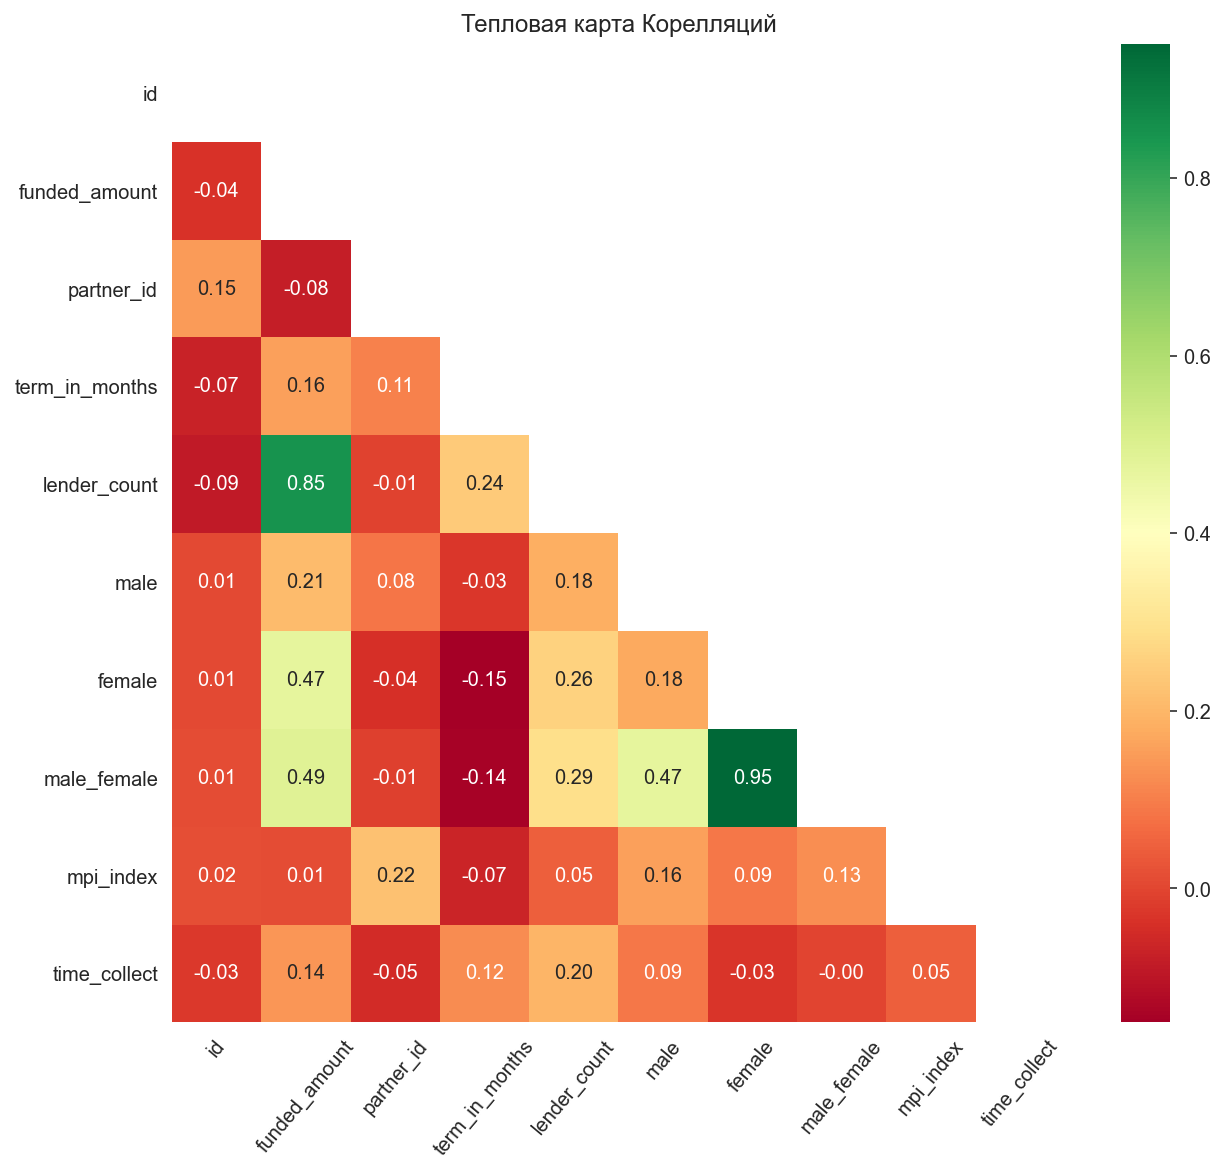

In [28]:
# посмотрим корелляции тепловой картой всего дф числовых значений,
# это поможет нам понять что нужно визуализировать
plt.figure(figsize=(10,9))
sns.heatmap(df1.corr(), annot=True, cmap='RdYlGn', fmt='.2f',
            mask=np.triu(df1.corr())) # .2f-2цифры
plt.xticks(rotation=50)
plt.title('Тепловая карта Корелляций')
plt.show()

- Есть высокая корелляция кол-во кредиторов - сумма сбора
- Есть небольшая корелляция кол-во женщин заемщиков - сумма сбора, кол-во заемщиков - сумма сбора, общее кол-во заемщиков - женщины, возможно очень много женщин

### 3.1 Скорость анализа сбора средств

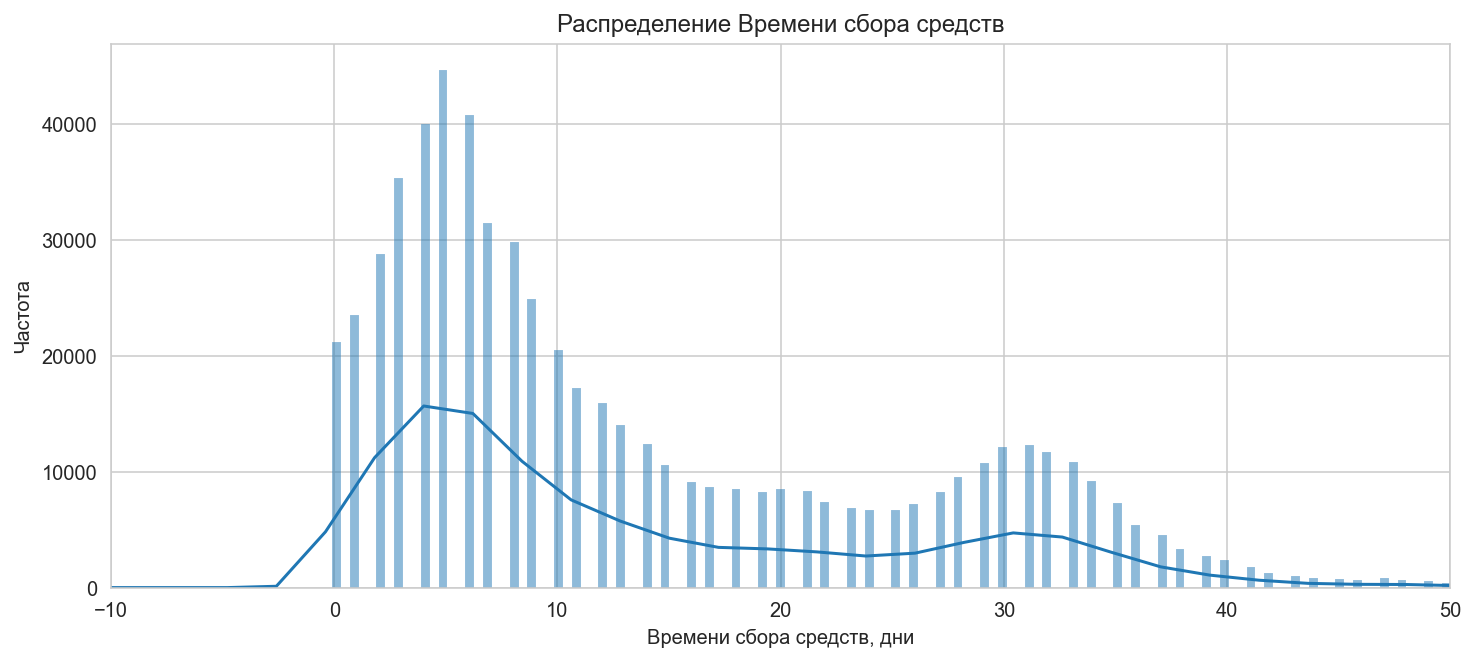

In [84]:
# график распределения Времени сбора средств, ограничим 80днями
# но есть заявки вплоть до 400дней
plt.figure(figsize=(12,5))
sns.histplot(df1, x = 'time_collect', kde=True)
plt.xlim(-10, 50) # ограничиваем ось X
plt.xlabel('Времени сбора средств, дни')
plt.ylabel('Частота')
plt.title('Распределение Времени сбора средств')
plt.show()

* Медианное время сбора средств - 9 дней, следующий наиболее частый пик это 1 месяц (30-31 дней)

In [30]:
print('Медианное время сбора средств в днях:', round(df1['time_collect'].median()))

Медианное время сбора средств в днях: 9


#### 3.1.1 Время сбора средств - Кол-во кредиторов

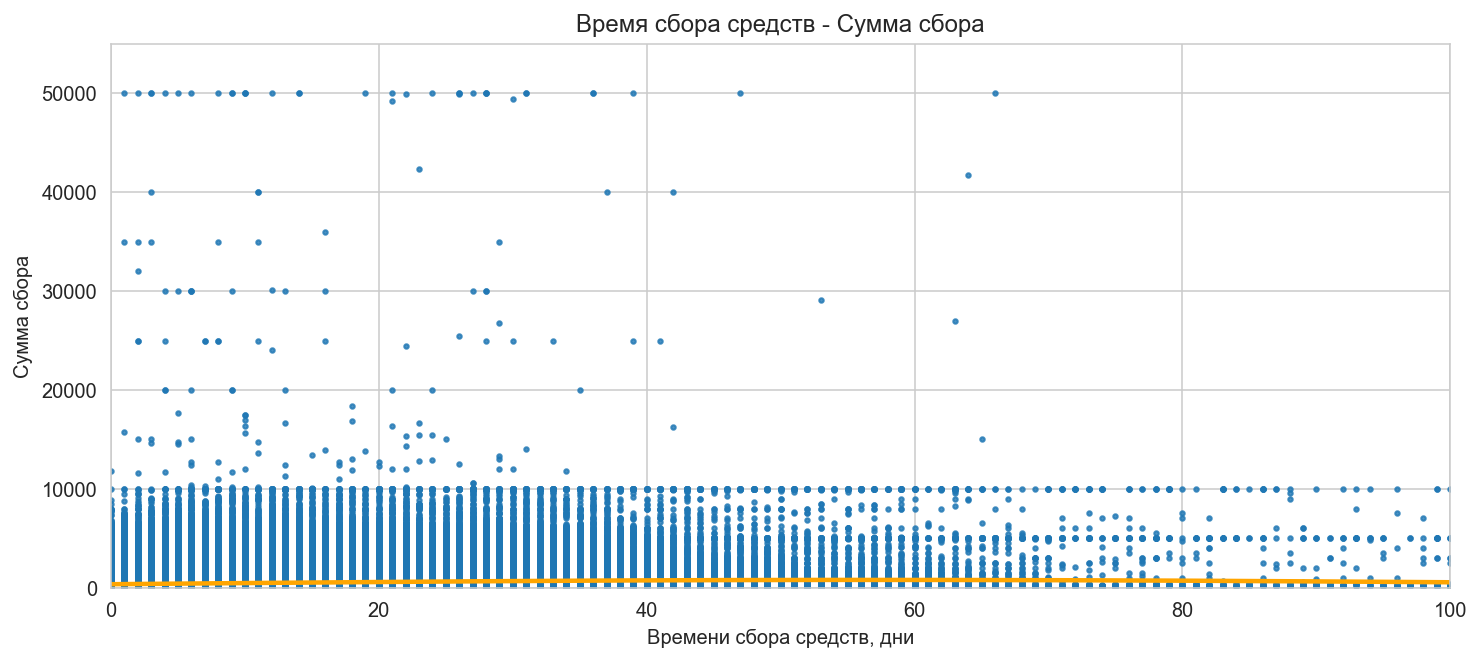

In [85]:
# график зависимости Время сбора средств - Кол-во кредиторов
plt.figure(figsize=(12,5))
sns.regplot(data = df1.dropna(subset=['time_collect', 'funded_amount']),\
            x='time_collect', y='funded_amount', lowess=True,\
            line_kws={'color': 'orange'}, scatter_kws={'s':5})
# lowess=True непараметрическая регрессия (быстрее)
# ci=None для отключения интервала достоверности
#scatter_kws с параметром s=0 для отключения точек (s -размер точек, 0 -невидимые).
plt.xlim(0,100)
plt.ylim(0, 55000)
plt.xlabel('Времени сбора средств, дни')
plt.ylabel('Cумма сбора')
plt.title('Время сбора средств - Cумма сбора')
plt.show()

-Корелляции между суммы сбора от времени сбора - нет. Но есть скученность заявок от 0 до 10 000 долларов. Время сбора в зависимости от суммы может быть как больше так и меньше.

#### 3.1.2 Время сбора средств - по Секторам и подсекторам применения. Сектора

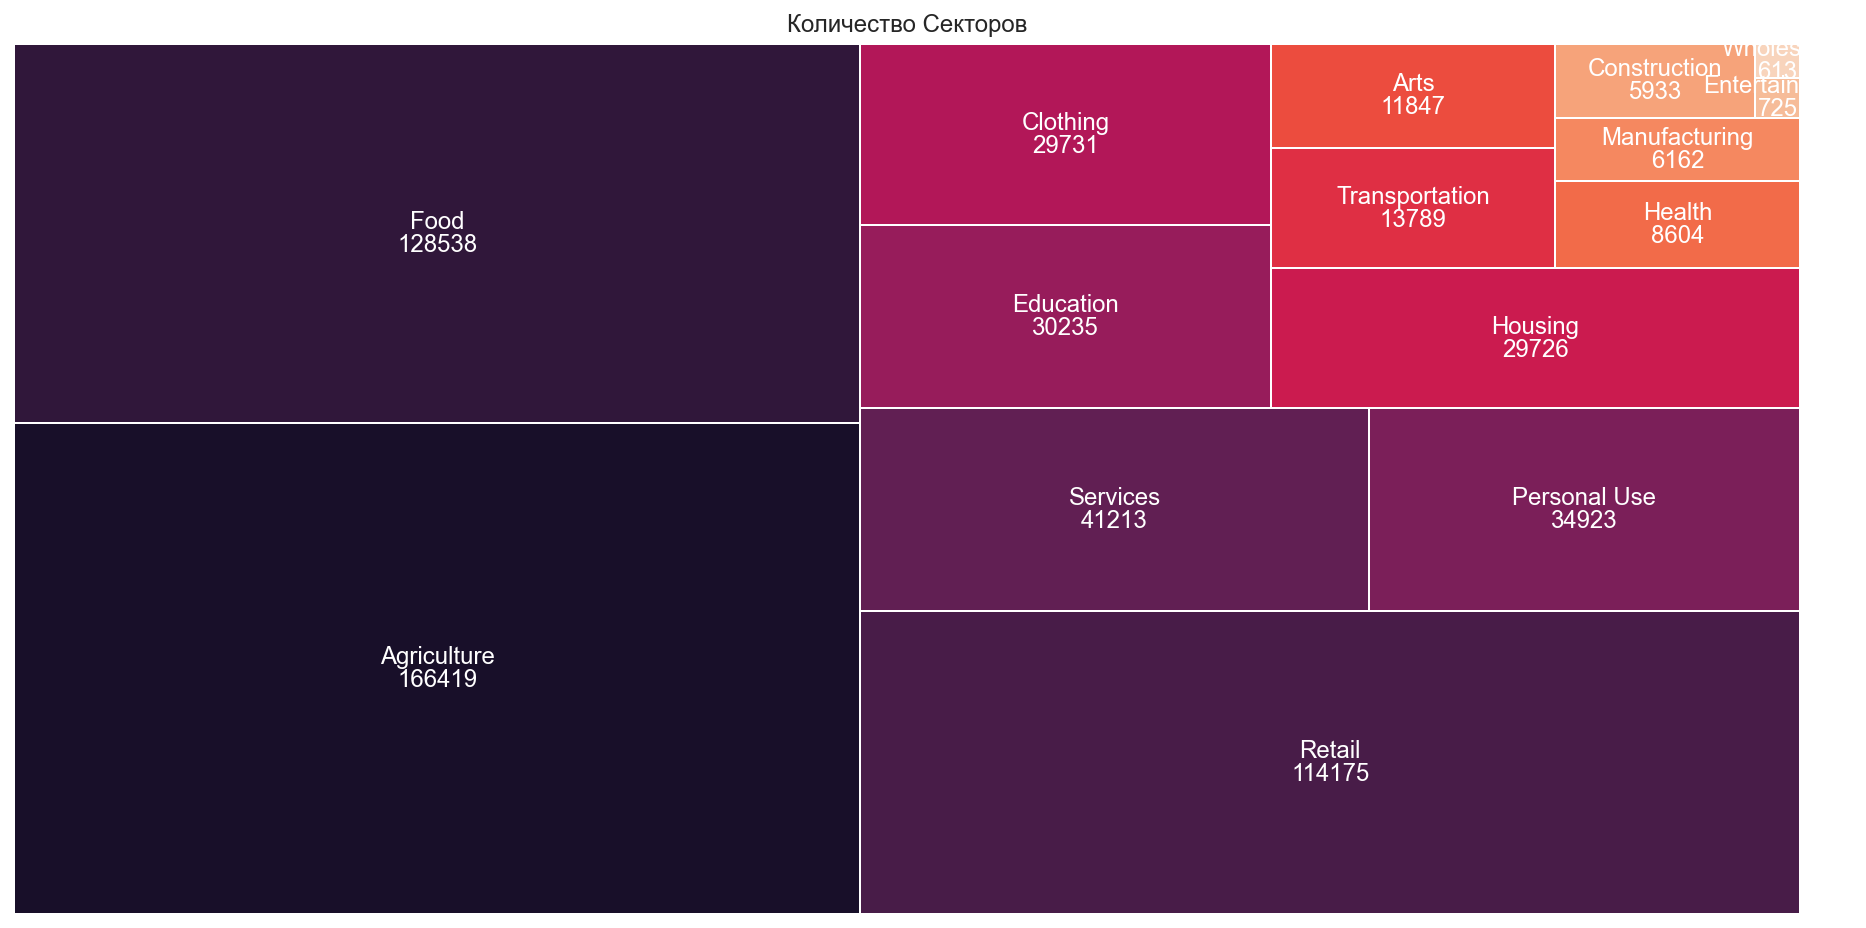

In [177]:
# посмотрим сначала просто на сектора
sector_count = df1['sector'].value_counts()

plt.figure(figsize=(16, 8))
squarify.plot(sizes=sector_count.values,
             label= sector_count.index,
             value= sector_count.values,
             text_kwargs = {'fontsize': 12, 'color': 'white'},
             color = sns.color_palette("rocket", len(sector_count))
             )
plt.title('Количество Секторов')
plt.axis('off')
plt.show()

Топ популярных секторов: Агрокультура, Еда, Ритейл.

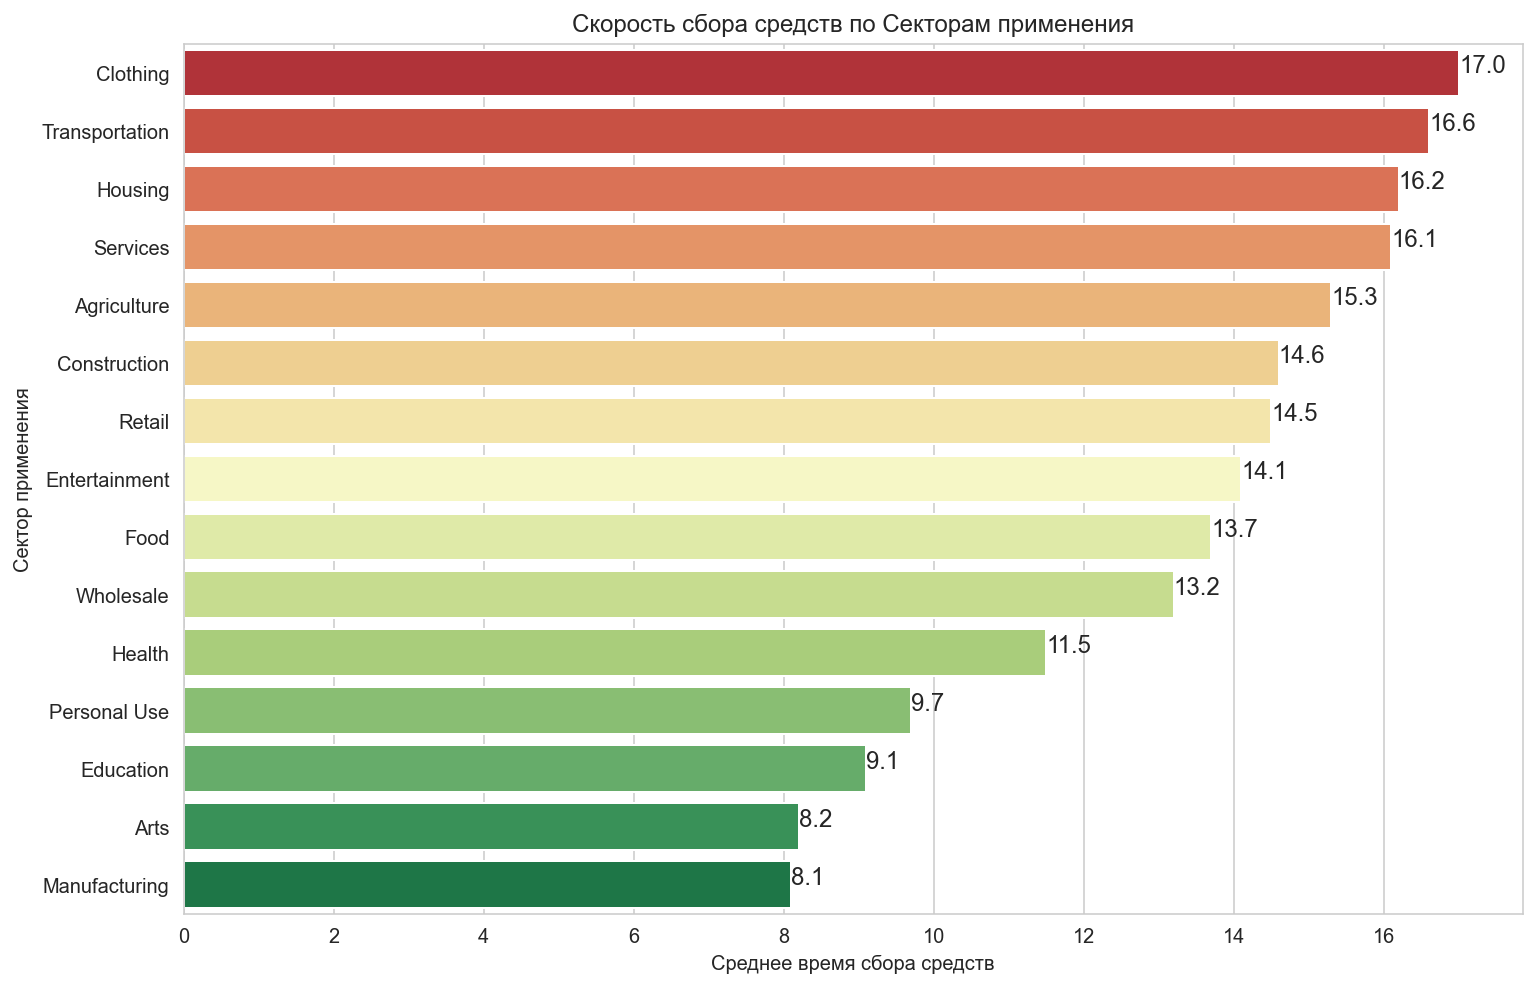

In [185]:
sector_speed = df1.groupby('sector', as_index=False)[['time_collect']].mean().round(1)\
  .sort_values(by='time_collect', ascending=False)

# построим барплот
plt.figure(figsize=(12, 8))
sns.barplot(data = sector_speed, x='time_collect', y='sector', palette='RdYlGn')
for y, x in enumerate(sector_speed['time_collect']):
    plt.text(x, y, f'{x:.1f}', fontsize=12)
plt.title('Скорость сбора средств по Секторам применения')
plt.xlabel('Среднее время сбора средств')
plt.ylabel('Сектор применения')
plt.show()

* Самый быстрый сбор средств у секторов производства, искусства, образования.
* Самый медленный сбор средств у секторов одежды, транспорта, строительства.

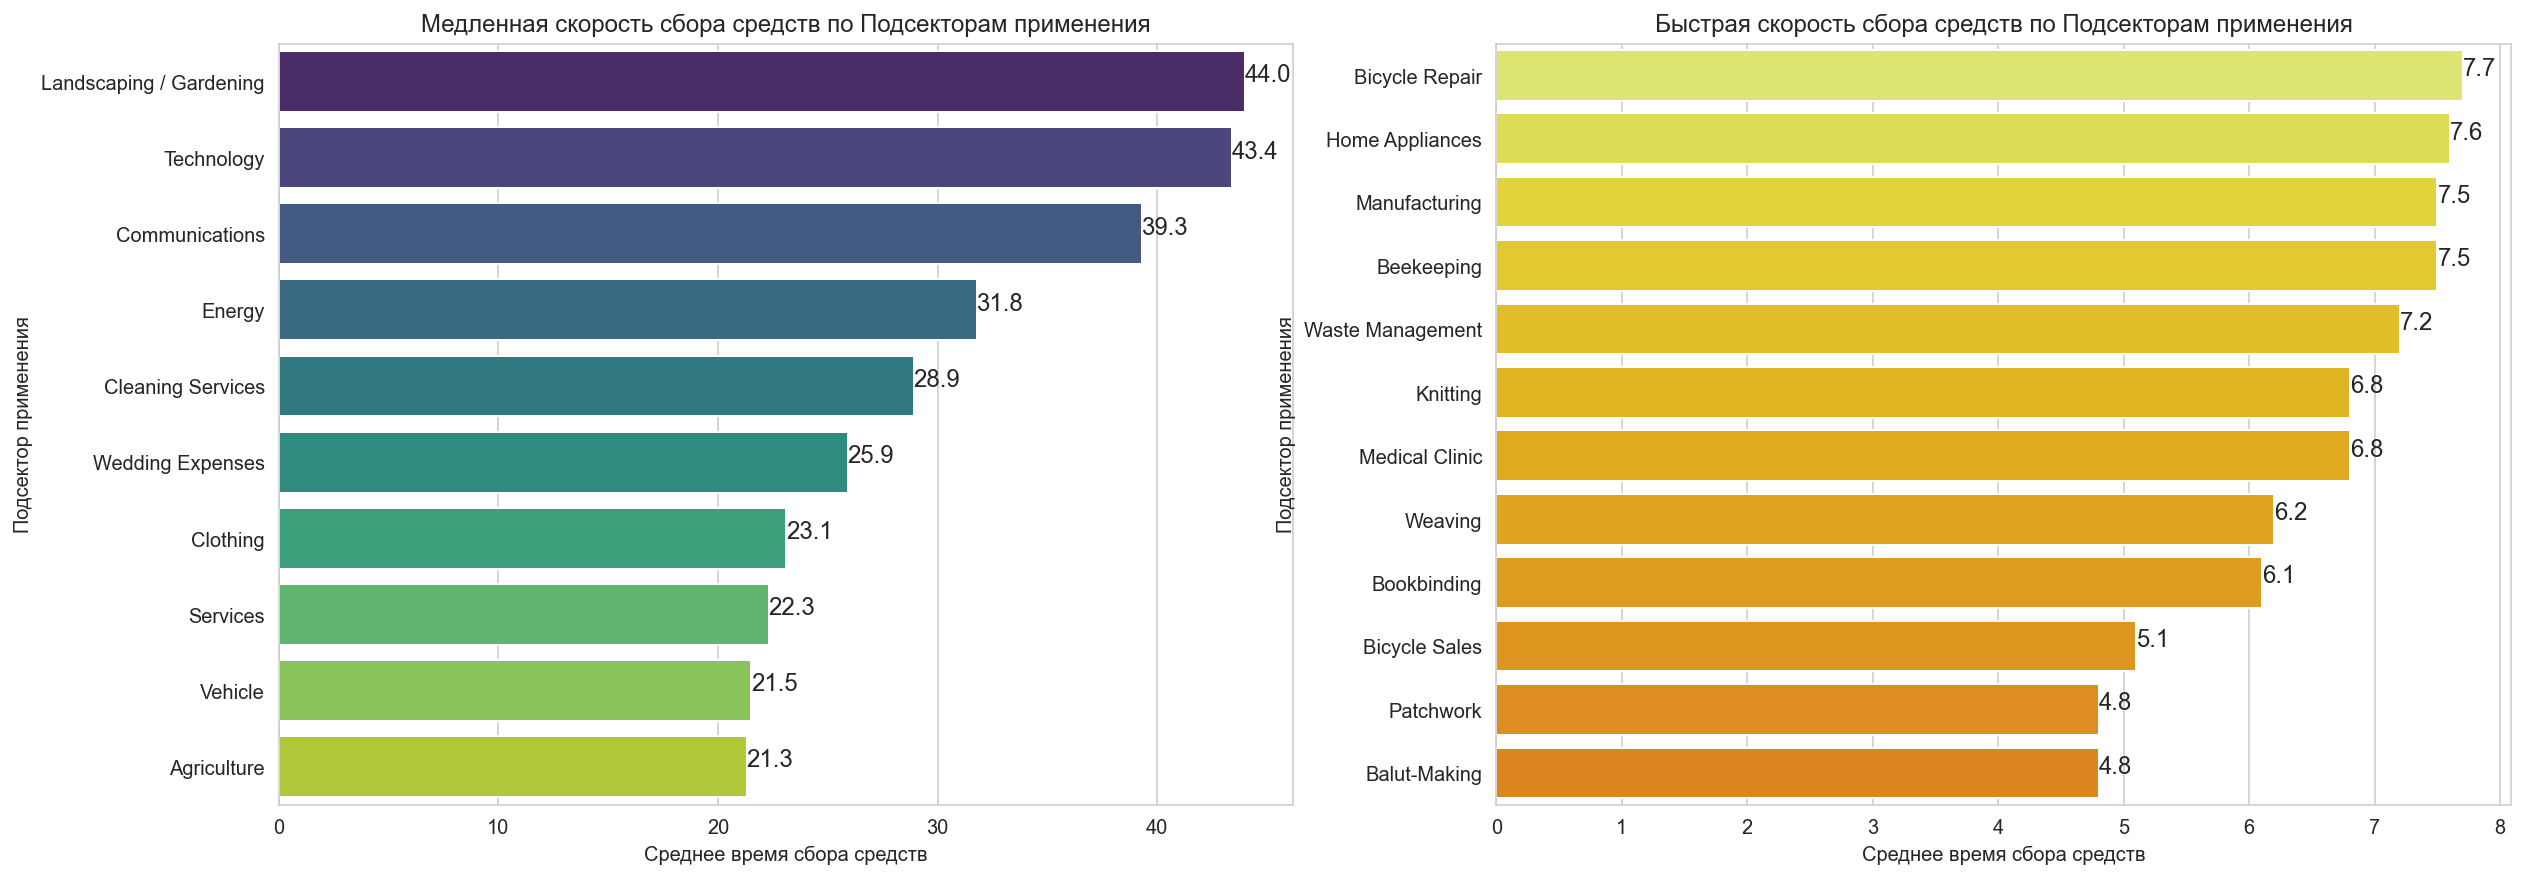

In [194]:
# Скорость сбора средств по Подсекторам применения'
plt.figure(figsize=(20, 7))

ax1 = plt.subplot(1, 2, 1)
activity_slow = df1.groupby('activity', as_index=False)[['time_collect']].mean().round(1)\
  .sort_values(by='time_collect', ascending=False).head(10)

sns.barplot(data = activity_slow , x='time_collect', y='activity', ax=ax1, palette='viridis') # cividis
for y, x in enumerate(activity_slow['time_collect']):
    plt.text(x, y, f'{x:.1f}', fontsize=12)
plt.title('Медленная скорость сбора средств по Подсекторам применения')
plt.xlabel('Среднее время сбора средств')
plt.ylabel('Подсектор применения')


ax2 = plt.subplot(1, 2, 2)
activity_fast = df1.groupby('activity', as_index=False)[['time_collect']].mean().round(1)\
  .sort_values(by='time_collect', ascending=False).tail(12)

sns.barplot(data = activity_fast, x='time_collect', y='activity', ax=ax2, palette='Wistia')
for y, x in enumerate(activity_fast['time_collect']):
    plt.text(x, y, f'{x:.1f}', fontsize=12)
plt.title('Быстрая скорость сбора средств по Подсекторам применения')
plt.xlabel('Среднее время сбора средств')
plt.ylabel('Подсектор применения')

plt.show()

* Самый быстрый сбор у подсекторов: еда, шитье, велосипеды, медицина.
* Самый медленный сбор у подсекторов: садоводство, технологические гаджеты, энергетика, уборка.


#### 3.1.3 Время сбора средств - id партнера выдающего кредит

In [35]:
id = df1.pivot_table(index='partner_id',
                values='time_collect',
                aggfunc=['mean', 'count'])

id.rename(columns ={'mean':'time_collect_mean', 'count':'time_collect_count'}, inplace=True)
id.columns = id.columns.droplevel(1)
id = id.sort_values(by='time_collect_count', ascending=False)
id.head(3)

,time_collect_mean,time_collect_count
partner_id,,
145.0,8.910541,106004
199.0,18.526950,16345
311.0,7.049062,15776


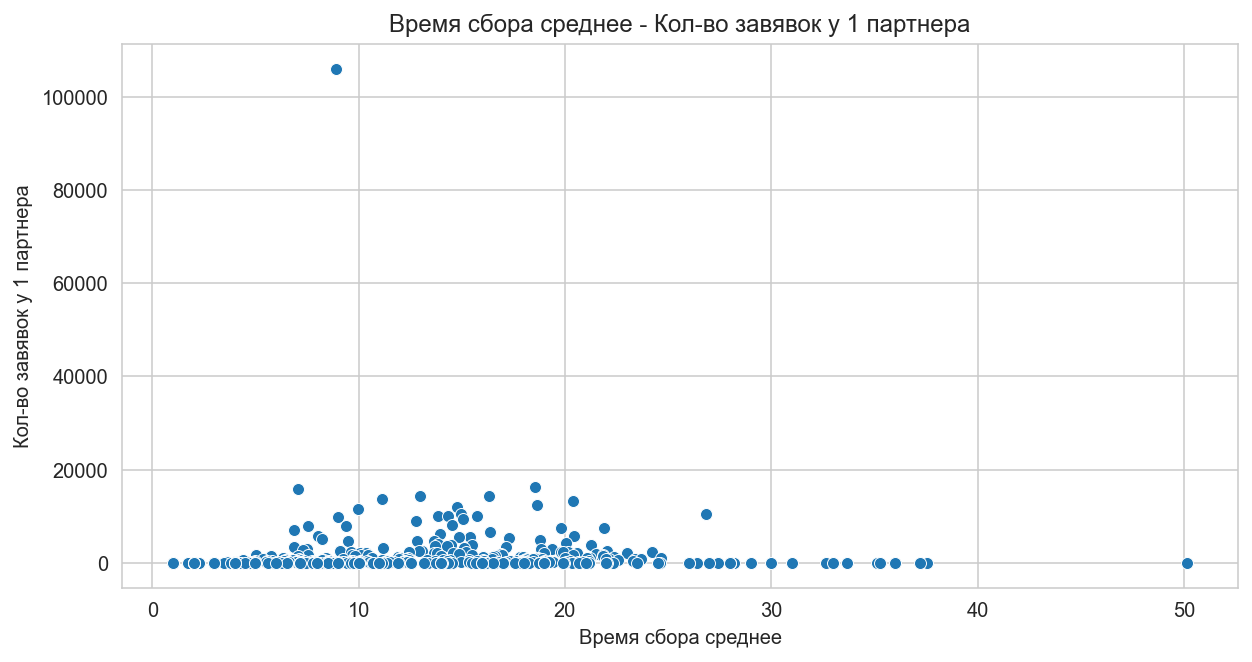

In [102]:
# Зависимость Время сбора среднее - Кол-во завявок у 1 партнера выдающего кредит
plt.figure(figsize=(10,5))
sns.scatterplot(data = id, x='time_collect_mean', y='time_collect_count')
plt.xlabel('Время сбора среднее')
plt.ylabel('Кол-во завявок у 1 партнера')
plt.title('Время сбора среднее - Кол-во завявок у 1 партнера')
plt.show()

* Есть 1 партнер у которого больше 100 000 заявок, ого, и у него скорость сбора примерно 9дней.
* Среднее время сбора у 1 партнера от кол-ва заявок ни о чем не говорит, больше просто распределение показывает.

#### 3.1.4 Время сбора средств - Страна
country - название страны, в которой выдан кредит

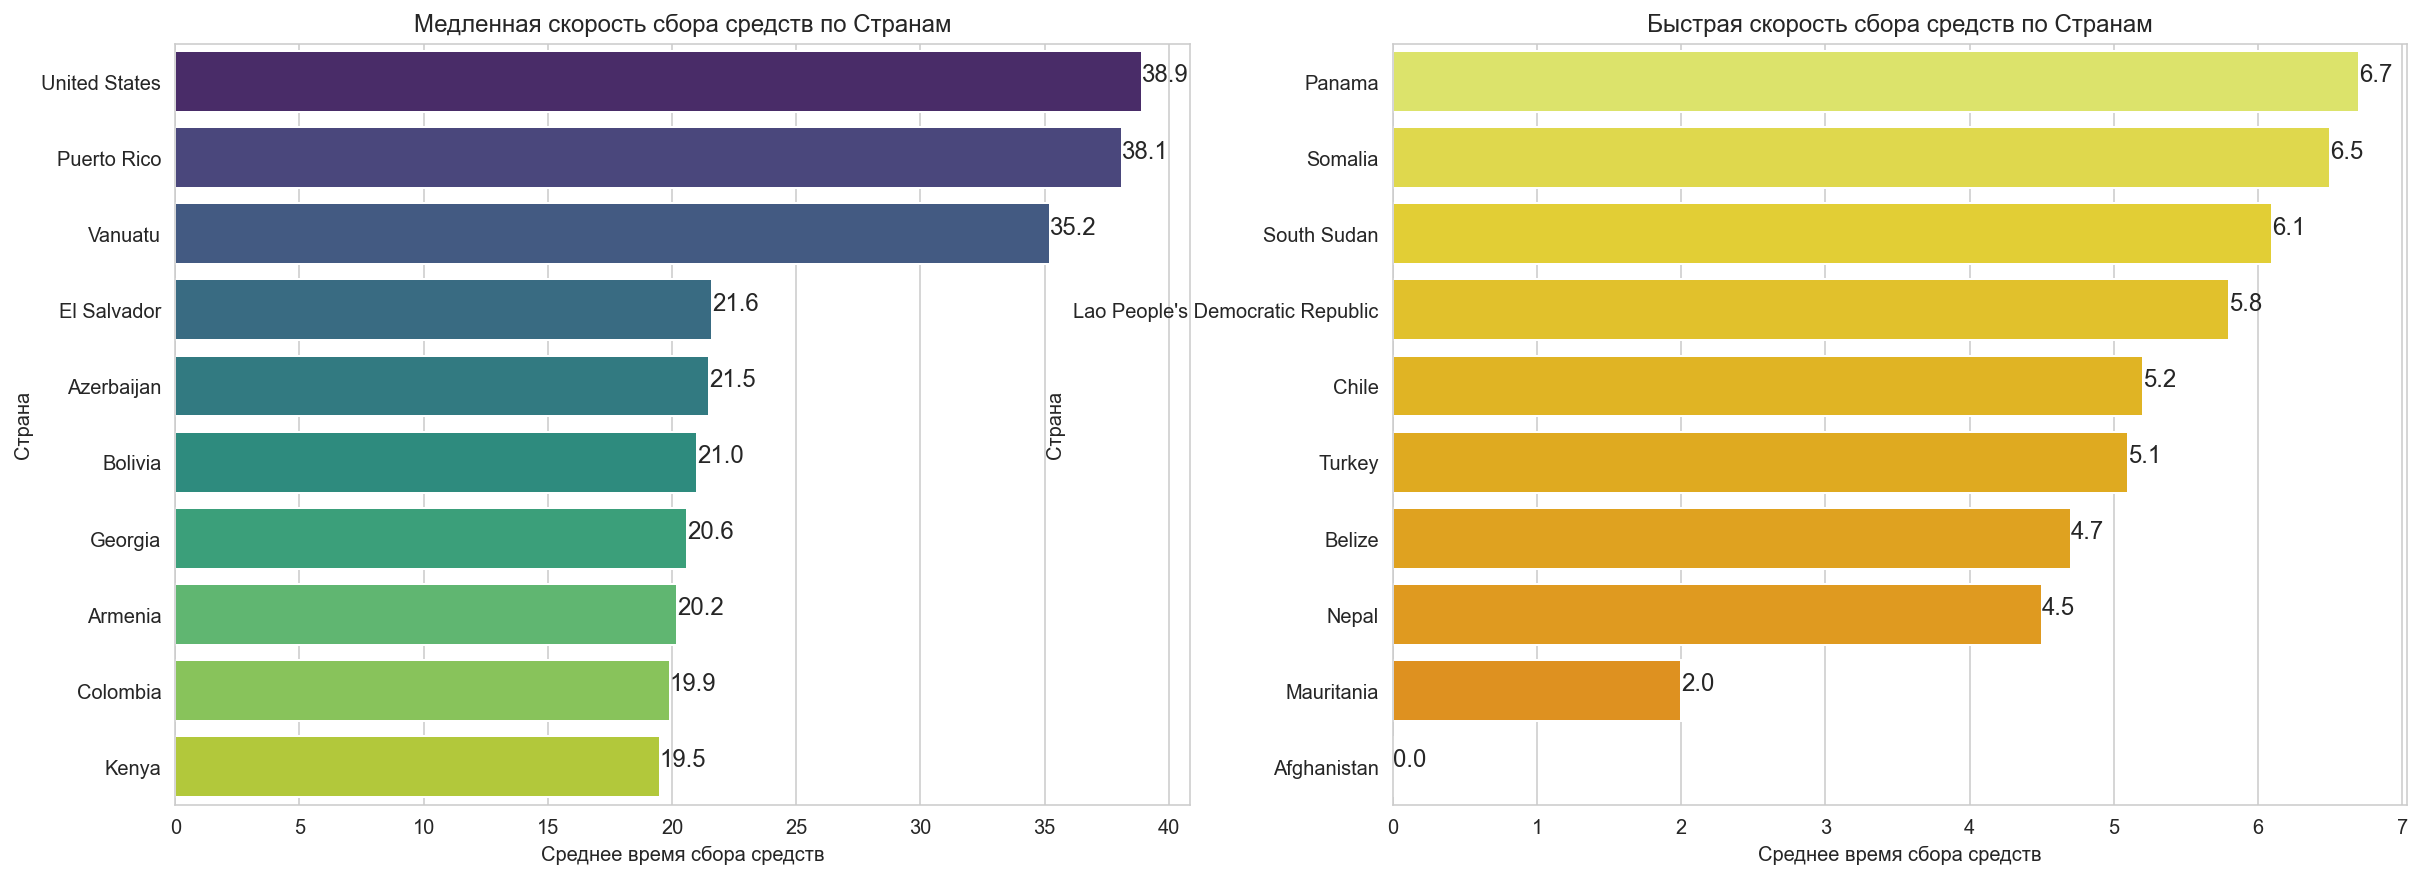

In [195]:
# Время сбора средств по Странам'
plt.figure(figsize=(20, 7))

ax1 = plt.subplot(1, 2, 1)
country_slow = df1.groupby('country', as_index=False)[['time_collect']].mean().round(1)\
  .sort_values(by='time_collect', ascending=False).head(10)

sns.barplot(data = country_slow, x='time_collect', y='country', ax=ax1, palette='viridis') # cividis
for y, x in enumerate(country_slow['time_collect']):
    plt.text(x, y, f'{x:.1f}', fontsize=12)
plt.title('Медленная скорость сбора средств по Странам')
plt.xlabel('Среднее время сбора средств')
plt.ylabel('Страна')

ax2 = plt.subplot(1, 2, 2)
country_fast = df1.groupby('country', as_index=False)[['time_collect']].mean().round(1)\
  .sort_values(by='time_collect', ascending=False).tail(10)

sns.barplot(data = country_fast , x='time_collect', y='country', ax=ax2, palette='Wistia')
for y, x in enumerate(country_fast['time_collect']):
    plt.text(x, y, f'{x:.1f}', fontsize=12)
plt.title('Быстрая скорость сбора средств по Странам')
plt.xlabel('Среднее время сбора средств')
plt.ylabel('Страна')

plt.show()

* Самый быстрый сбор средств у стран: Афганистан (2 заявки), Мауритания, Непал. Как правило это бедные страны, и страны где малое кол-во заявок было.
* Самый медленый сбор средств у стран: США, Пуэрто Рико, Вануату. Это страны не бедные, более скурпулезно проверяют людей видимо.


#### 3.1.5 Время сбора средств - Суб-континент

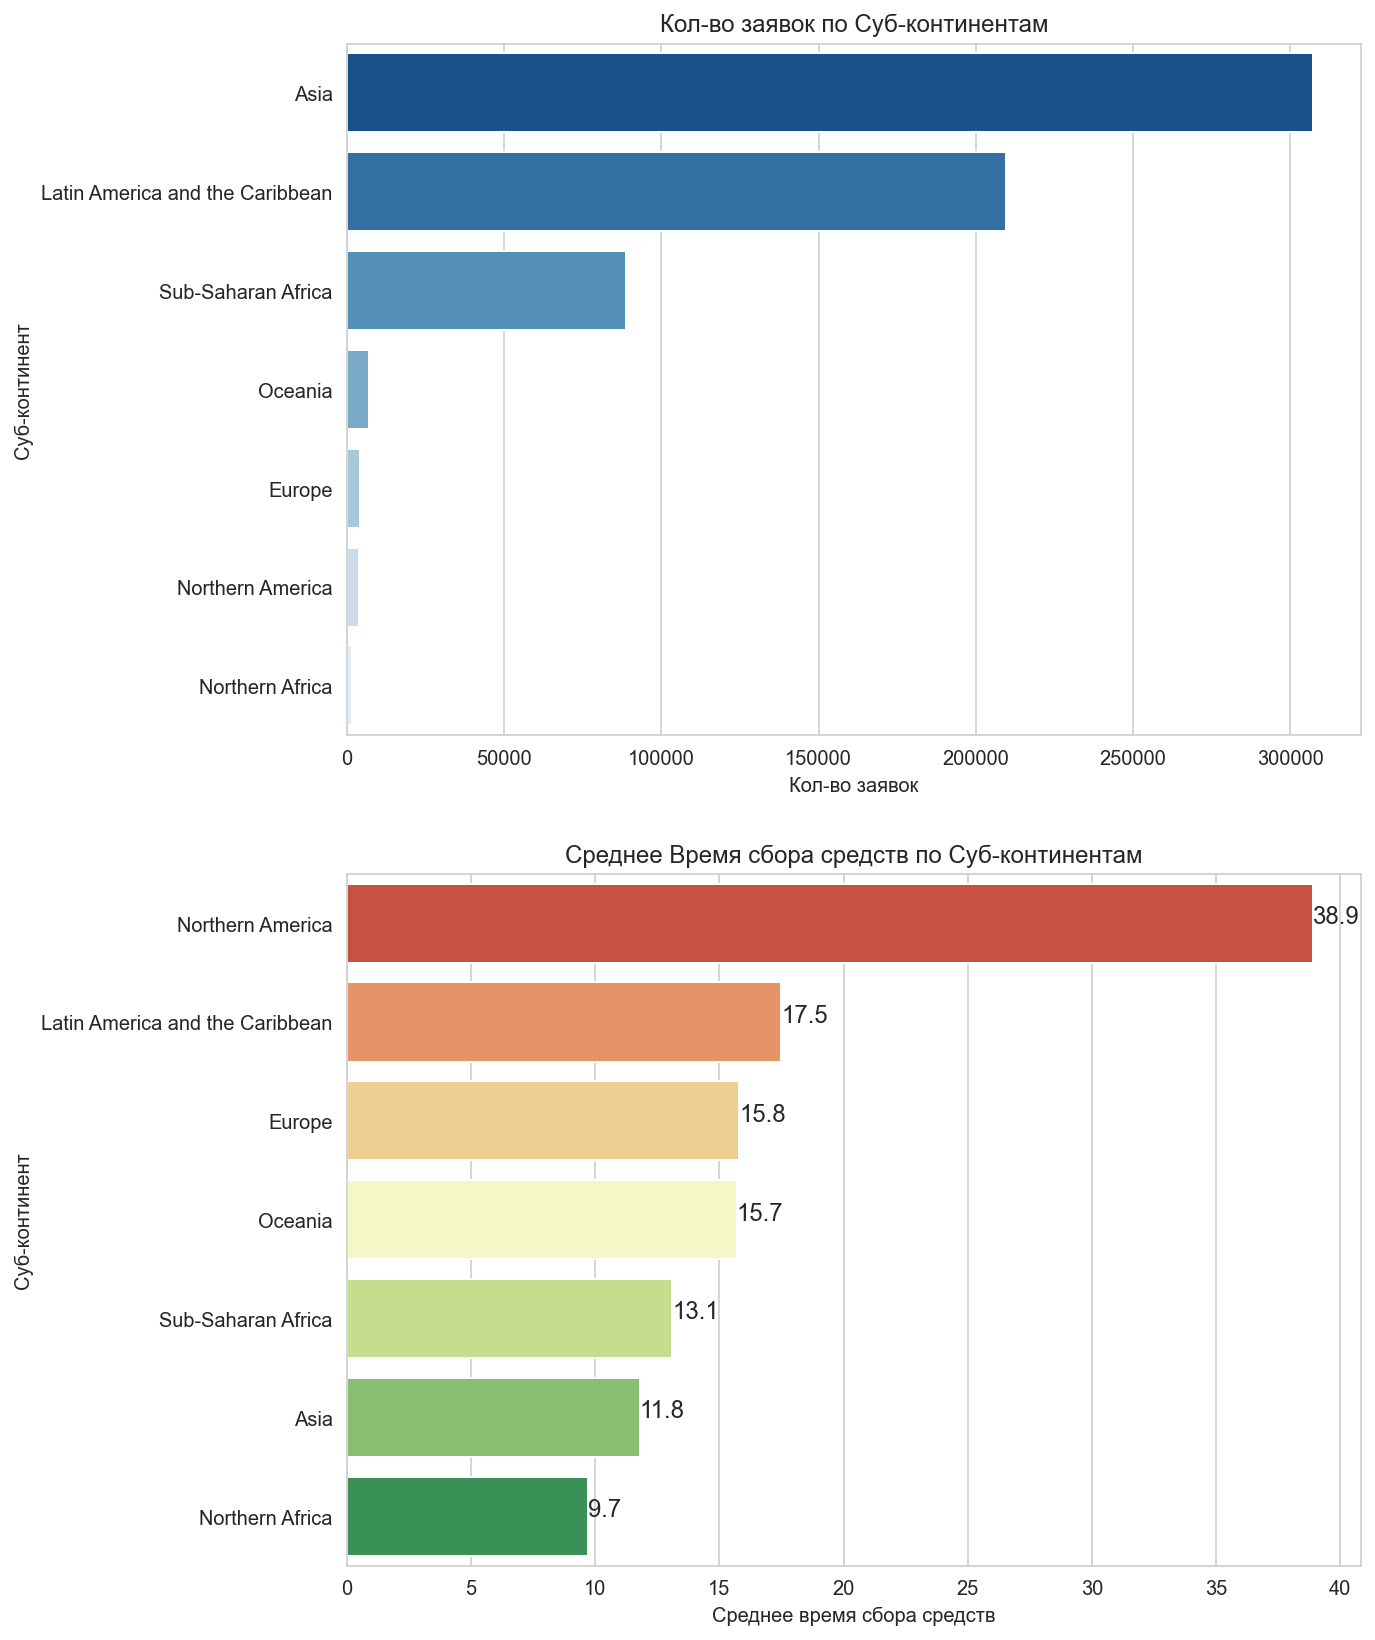

In [196]:
# Время сбора средств по Суб-континентам'
plt.figure(figsize=(20, 14))

ax1 = plt.subplot(2, 2, 1)
# посчитаем кол-во Суб-континетов с сортировкой
sns.countplot(y=df1['sub_region_continent'], palette='Blues_r', \
              order=df1['sub_region_continent'].value_counts().index, \
              ax=ax1)
plt.title('Кол-во заявок по Суб-континентам')
plt.xlabel('Кол-во заявок')
plt.ylabel('Суб-континент')

ax2 = plt.subplot(2, 2, 3)
# cгруппируем по Суб-континентам
sub_region_speed = df1.groupby('sub_region_continent', as_index=False)\
 [['time_collect']].mean().round(1)\
  .sort_values(by='time_collect', ascending=False)
# построим барплот
sns.barplot(data = sub_region_speed, x='time_collect', y='sub_region_continent',\
            palette='RdYlGn', ax=ax2)
for y, x in enumerate(sub_region_speed['time_collect']):
    plt.text(x, y, f'{x:.1f}', fontsize=12)
plt.title('Среднее Время сбора средств по Суб-континентам')
plt.xlabel('Среднее время сбора средств')
plt.ylabel('Суб-континент')
plt.show()

По субконтинентам:
- Большинство заявок с Азии, Латинской Америки и Южной Африки
- Северная Африка, Азия, Южная Африка (от Сахары) страны бедные, люди более охотнее кредитуют таких.
- Северная Америка не является бедной страной, поэтому среднее Время сбора средств высокое, больше разбирательств и недоверия к заявителям.


#### 3.1.6 Время сбора средств - repayment_interval (регулярность выплат)

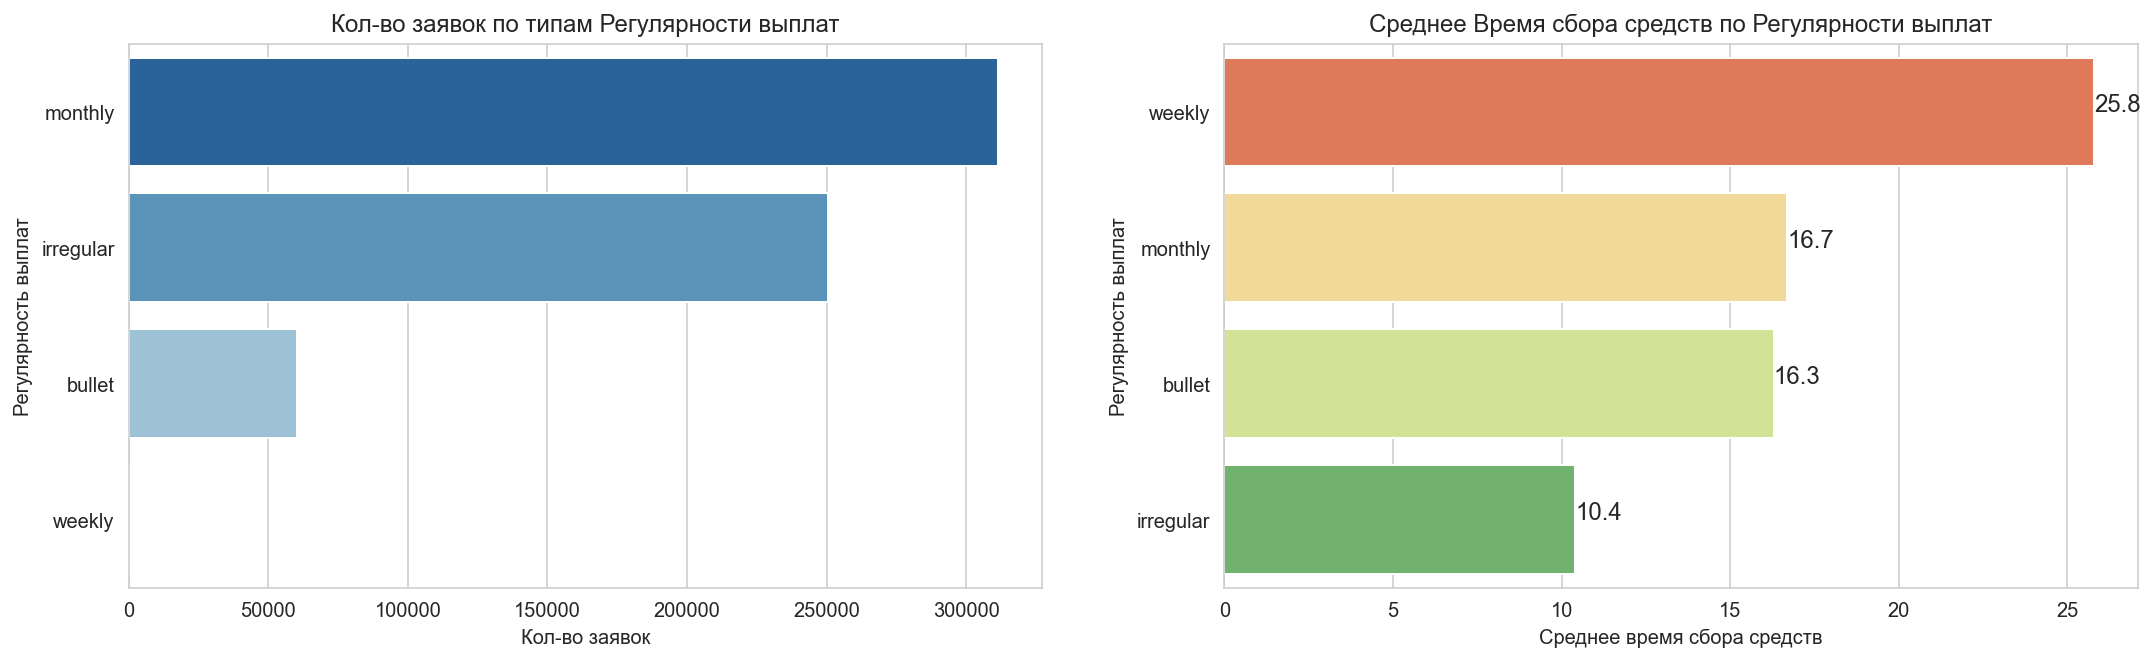

In [197]:
plt.figure(figsize=(18, 5))

ax1 = plt.subplot(1, 2, 1)
# посчитаем кол-во регулярностей выплат с сортировкой
sns.countplot(y=df1['repayment_interval'], palette='Blues_r', \
              order=df1['repayment_interval'].value_counts().index, ax=ax1)
plt.title('Кол-во заявок по типам Регулярности выплат')
plt.xlabel('Кол-во заявок')
plt.ylabel('Регулярность выплат')


ax2 = plt.subplot(1, 2, 2)
# cгруппируем по repayment_interval (регулярность выплат)
repayment_interval_speed = df1.groupby('repayment_interval', as_index=False)\
  [['time_collect']].mean().round(1)\
  .sort_values(by='time_collect', ascending=False)

# построим барплот
sns.barplot(data = repayment_interval_speed, x='time_collect', y='repayment_interval', palette='RdYlGn', ax=ax2)
for y, x in enumerate(repayment_interval_speed['time_collect']):
    plt.text(x, y, f'{x:.1f}', fontsize=12)
plt.title('Среднее Время сбора средств по Регулярности выплат')
plt.xlabel('Среднее время сбора средств')
plt.ylabel('Регулярность выплат')
plt.show()

По типам Регулярности выплат:
- monthly -ежемесячно самое популярное топ1, логично что ЗП 1 раз в месяц у большинсва людей
- irregular - нерегулярно, топ2, многие бедняки не знают когда у них получиться выплатить и кредиторы входят в положение

#### 3.1.7 Время сбора средств - Религия

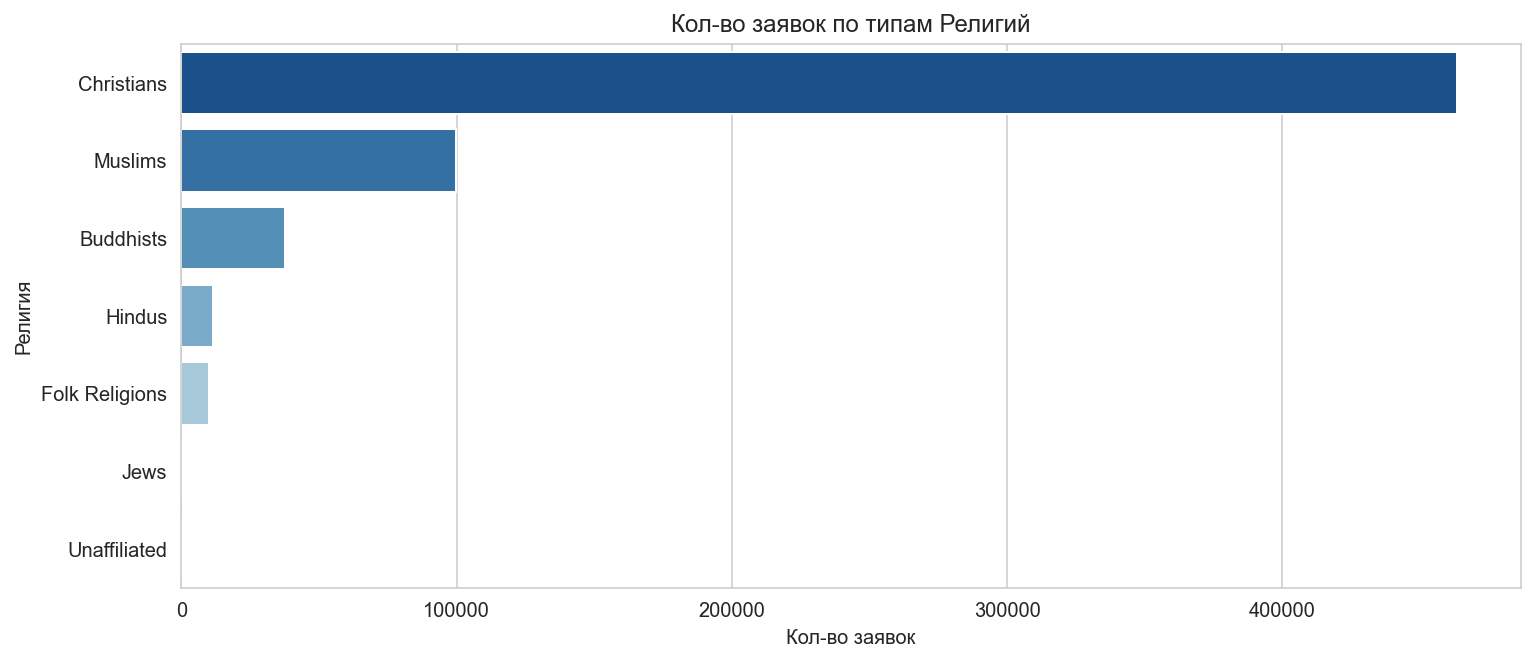

In [135]:
# посчитаем кол-во заявок по типам Религий
plt.figure(figsize=(12, 5))
sns.countplot(y=df1['main_country_religion'], palette='Blues_r', \
              order=df1['main_country_religion'].value_counts().index)
plt.title('Кол-во заявок по типам Религий')
plt.xlabel('Кол-во заявок')
plt.ylabel('Религия')
plt.show()

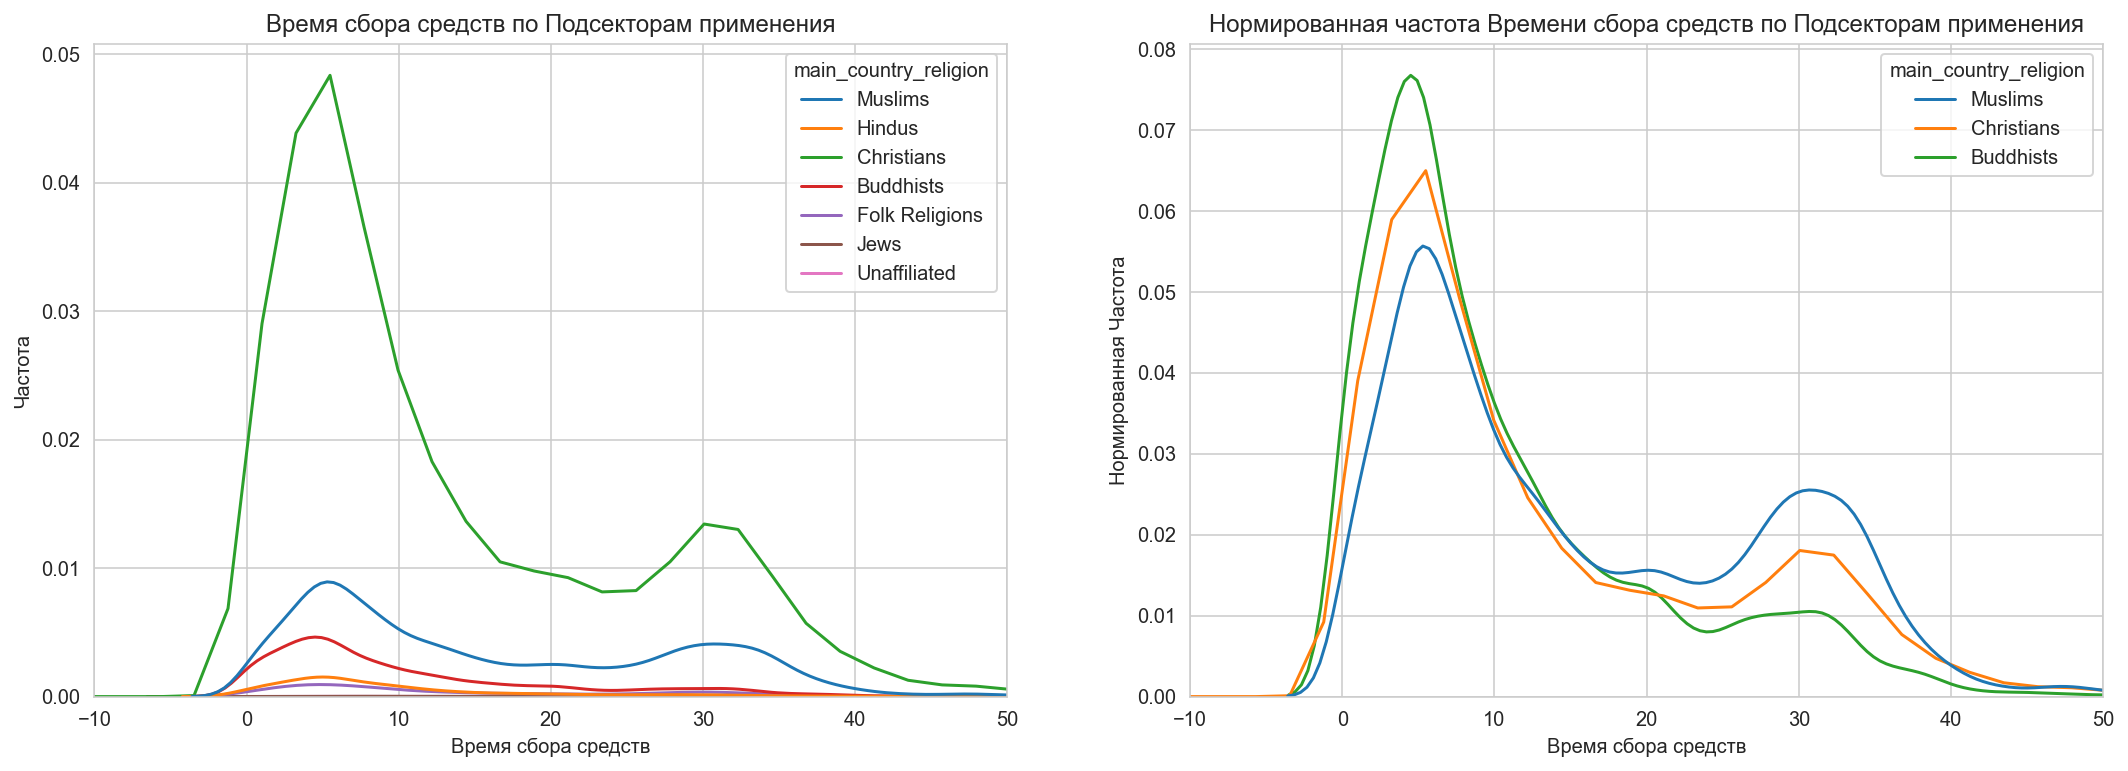

In [139]:
# Время сбора средств по Подсекторам применения
plt.figure(figsize=(18, 6))

ax1 = plt.subplot(1, 2, 1)
sns.kdeplot(data = df1, x='time_collect', hue='main_country_religion', ax=ax1)
plt.xlim(-10,50)
plt.title('Время сбора средств по Подсекторам применения')
plt.xlabel('Время сбора средств')
plt.ylabel('Частота')

ax2 = plt.subplot(1, 2, 2)
# уберем лишние религии чтобы не было каши
main_rel = ['Christians', 'Muslims', 'Buddhists']
# нормированный
sns.kdeplot(data = df1.query('main_country_religion in @main_rel'),
            x='time_collect', hue='main_country_religion', common_norm=False)
plt.xlim(-10,50)
plt.title('Нормированная частота Времени сбора средств по Подсекторам применения')
plt.xlabel('Время сбора средств')
plt.ylabel('Нормированная Частота')
plt.show()

По религиям:
- Больше всего заявок от Христиан, кредиторы скорее всего тоже христиане.
- Быстрее всего дают кредит Буддистам, на втором месте Христиане. Мусульманам дольше всего собирают кредит.

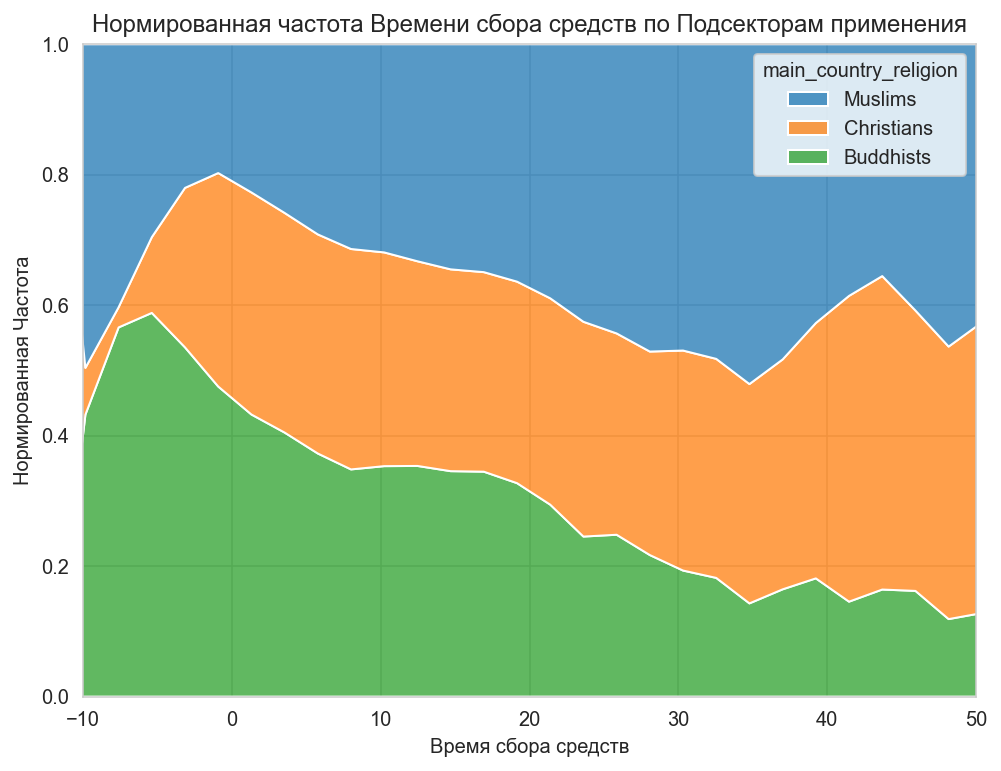

In [141]:
# нормированный, с заполниением 100%
main_rel = ['Christians', 'Muslims', 'Buddhists']

plt.figure(figsize=(8, 6))
sns.kdeplot(data = df1.query('main_country_religion in @main_rel'),
            x='time_collect', hue='main_country_religion', common_norm=False, multiple="fill") #
plt.xlim(-10,50)
plt.title('Нормированная частота Времени сбора средств по Подсекторам применения')
plt.xlabel('Время сбора средств')
plt.ylabel('Нормированная Частота')
plt.show()

### 3.2 Анализ заявок и индекса бедности



#### 3.2.1. Топ стран с большим и малым индексом бедности
* Подготовка данных по странам, обогащение популяции

In [43]:
# сагрегируем таблицу по странам
con = (df1.groupby(['country'], as_index=False)
  .agg({'id': 'count',
        'funded_amount': 'mean',
        'term_in_months': 'mean',
        'lender_count': 'mean',
        'male': 'mean',
        'female': 'mean',
        'male_female': 'mean',
        'mpi_index': 'first',
        'time_collect': 'mean',
        'sub_region_continent': 'first'
        })
)
con = con.rename(columns = {'id': 'count_id'})

con['mpi_index'] = round(con['mpi_index'], 4)

In [44]:
# обработаем дф населения страны
population = population[['country', 'population']]
# обработаем с loc (без предупреждения)
population.loc[:, ('country')] = population.loc[:, ('country')].str.replace('\xa0', '')
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     245 non-null    object
 1   population  245 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [45]:
# добавим в дф размер населения страны
if 'population' in con.columns:
    pass
else:
    con = con.merge(population, on='country', how='left', right_index=False)
con.head(1)

,country,count_id,funded_amount,term_in_months,lender_count,male,female,male_female,mpi_index,time_collect,sub_region_continent,population
0,Afghanistan,2,7000.0,7.0,256.0,0.0,1.0,1.0,0.2717,0.0,Asia,32890171


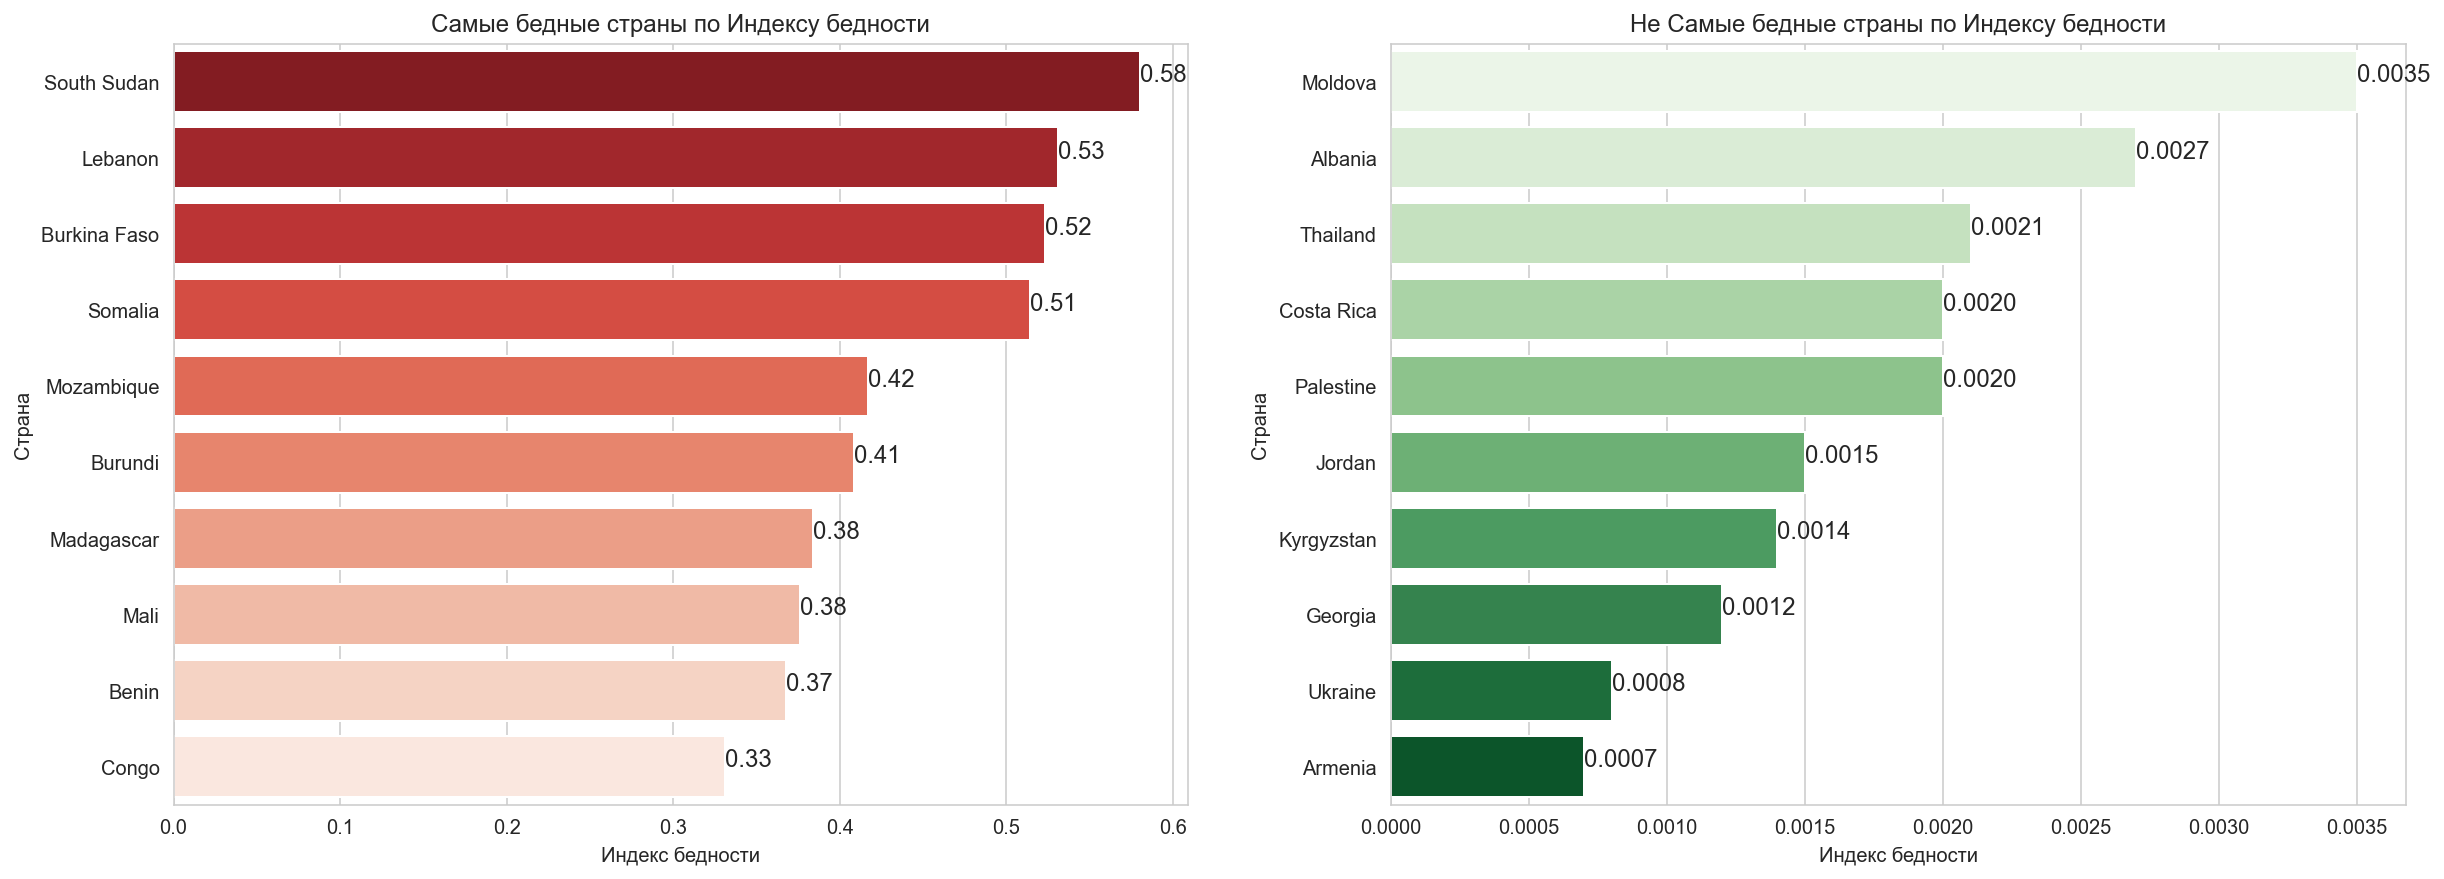

In [202]:
# Топ стран с большим и средним индексом бедности
plt.figure(figsize=(20, 7))

ax1 = plt.subplot(1, 2, 1)
con_poor = (con[['country', 'mpi_index']]
            .dropna()
            .sort_values(by='mpi_index', ascending=False)
            .head(10)
            )

sns.barplot(data = con_poor, x='mpi_index', y='country', ax=ax1, palette='Reds_r')
for y, x in enumerate(con_poor['mpi_index']):
    plt.text(x, y, f'{x:.2f}', fontsize=12)
plt.title('Самые бедные страны по Индексу бедности')
plt.xlabel('Индекс бедности')
plt.ylabel('Страна')


ax2 = plt.subplot(1, 2, 2)
con_middle = (con[['country', 'mpi_index']]
            .dropna()
            .sort_values(by='mpi_index', ascending=False)
            .tail(10)
            )

sns.barplot(data = con_middle , x='mpi_index', y='country', ax=ax2, palette='Greens')
for y, x in enumerate(con_middle['mpi_index']):
    plt.text(x, y, f'{x:.4f}', fontsize=12)

plt.title('Не Самые бедные страны по Индексу бедности')
plt.xlabel('Индекс бедности')
plt.ylabel('Страна')

plt.show()

-

In [47]:
# посмотрим топ10 бедных страны просто по индексу, без учета есть там заявки Kiva или нет.
df_mpi_index2 = df_mpi_index.sort_values(by='mpi_index', ascending=False).head(10)
# уберем страны, которые были в заявках Kiva
df_mpi_index2[~df_mpi_index2['country'].isin(con['country'])]

,country,mpi_index
111,Niger,0.601280
15,Chad,0.517011
14,Central African Republic,0.461348


По странам:
- Страны очень бедные, но где не представлена Kiva соовем: Нигер, Чад, Центральноафриканская Республика. Надо поработать в этих странах.
- Самые бедные страны где представлена Kiva - Южный судан, Ливан, Буркина Фасо, Сомали. Все эти страны в Африке, Ливан на стыке Африка-Азия.
- В индексе MPI только бедные страны 111шт, gоэтому нельзя сказать что страны у которых показатель близок к 0 - богатые.
https://hdr.undp.org/content/2022-global-multidimensional-poverty-index-mpi#/indicies/MPI

#### 3.2.2. Страна - индекс бедности - кол-во заявок/100тыс.населения

In [48]:
con2 = con[['country', 'count_id', 'mpi_index', 'population', 'sub_region_continent']]
# посчитаем Представленность заявок: Кол-во заявок на 100тыс.человек
con2['representation_100'] = round(con2['count_id'] / con2['population'] * 100000, 2)
con2 = con2.sort_values(by='representation_100', ascending=False)
con2.head(1)

,country,count_id,mpi_index,population,sub_region_continent,representation_100
69,Suriname,210,0.0112,6165,Latin America and the Caribbean,3406.33


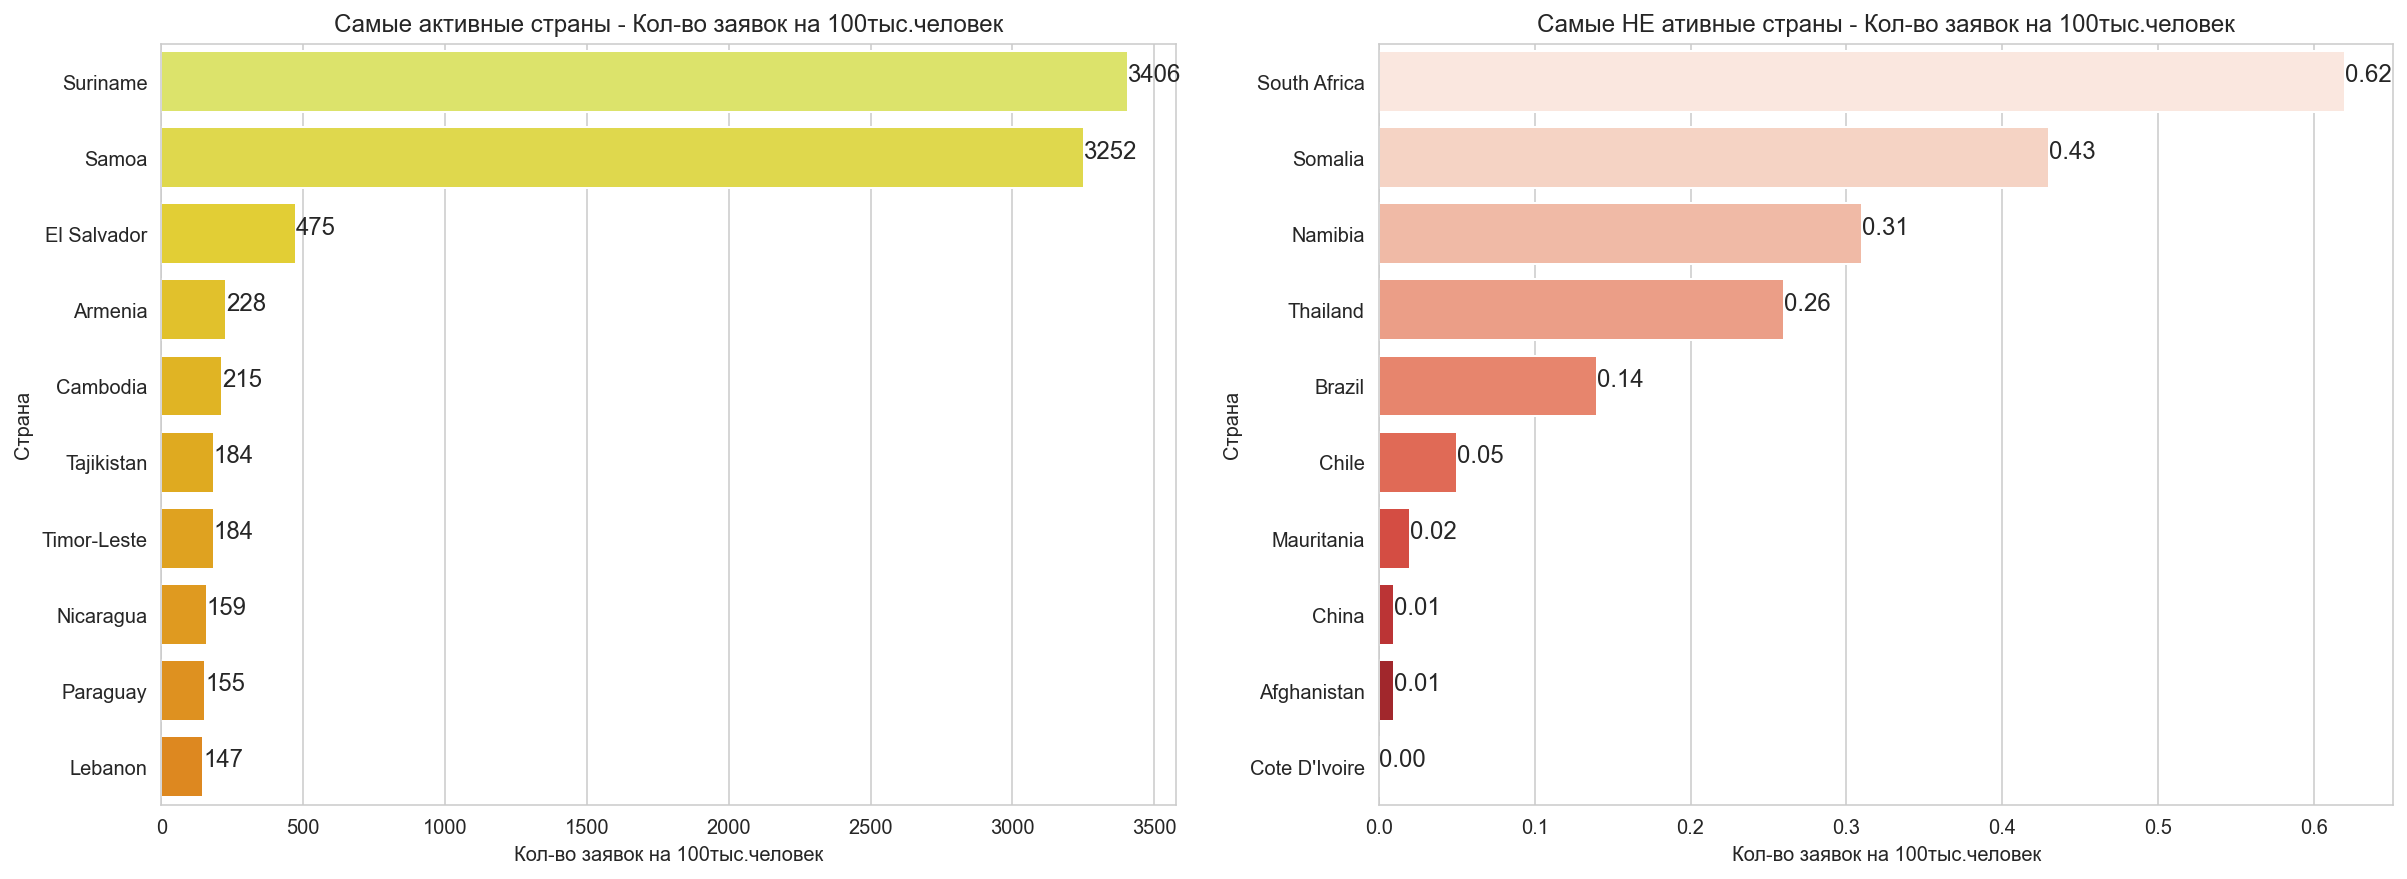

In [203]:
# Кол-во заявок на 100тыс.человек
plt.figure(figsize=(20, 7))

ax1 = plt.subplot(1, 2, 1)
rep_active = con2.head(10)

sns.barplot(data = rep_active, x='representation_100', y='country', ax=ax1, palette='Wistia')
for y, x in enumerate(rep_active['representation_100']):
    plt.text(x, y, f'{x:.0f}', fontsize=12)
plt.title('Самые активные страны - Кол-во заявок на 100тыс.человек')
plt.xlabel('Кол-во заявок на 100тыс.человек')
plt.ylabel('Страна')


ax2 = plt.subplot(1, 2, 2)
rep_passive = con2.tail(10)

sns.barplot(data = rep_passive , x='representation_100', y='country', ax=ax2, palette='Reds')
for y, x in enumerate(rep_passive['representation_100']):
    plt.text(x, y, f'{x:.2f}', fontsize=12)
plt.title('Самые НЕ ативные страны - Кол-во заявок на 100тыс.человек')
plt.xlabel('Кол-во заявок на 100тыс.человек')
plt.ylabel('Страна')

plt.show()

По кол-ву заявок на страны:
- Самые активные страны в пересчете на 100тыс.человек: Suriname, Samoa. Это Латинская америка, и Океания. Далековато от бедных стран Африки. Наверное сказывается близость к месту где была основана Kiva -запад США (Сан-Франциско) и наличие техники/не такая бедность.
- Наименьшее кол-во заявок в пересчете на 100тыс.человек: Cove D'Ivoire, Afganistan, Mauritania, Chilie. В основном это Африка, Азия, бедные страны.

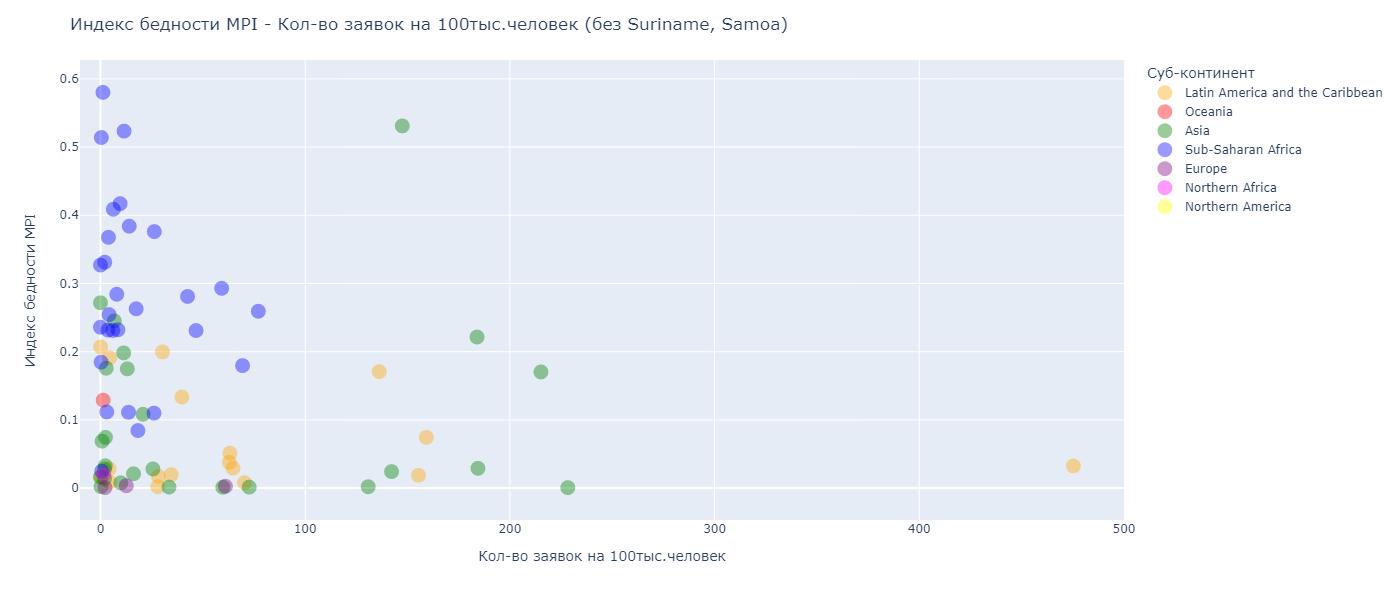

In [50]:
# строим plotly scatter
fig = px.scatter(con2,
                 x='representation_100',
                 range_x=[-10, 500], # ограничиваем ось X
                 y='mpi_index',
                 #size='population',
                 color='sub_region_continent',
                 hover_name='country',
                 hover_data=['population', 'count_id'],
                 size_max=50,
                 opacity=0.4,
                 color_discrete_sequence=[
                 "orange", "red", "green", "blue", "purple", "magenta", "yellow"],
                 width=1400, height=600
                 )
# добавляем надписи
fig.update_layout(title='Индекс бедности MPI - Кол-во заявок на 100тыс.человек (без Suriname, Samoa)',
                   xaxis_title='Кол-во заявок на 100тыс.человек',
                   yaxis_title='Индекс бедности MPI',
                   legend_title='Суб-континент')
fig.update_traces(marker_size=15)
fig.show()

- У стран Африки очень высокая бедность и очень мало заявок на 100тыс.человек, там Kiva явно недостаточно представлена.

In [51]:
# сагрегируем данные по годам и построим график с анимацией
# добавим год
df1['year'] = df1['disbursed_time'].dt.to_period('Y').dt.to_timestamp().dt.date

# сагрегируем таблицу по годам и странам
# ограничим >=2014ым
con3 = (df1[df1['year'] >= datetime.strptime('2014-01-01', '%Y-%m-%d').date()]
        .groupby(['country', 'year'], as_index=False)
        .agg({'id': 'count',
              'mpi_index': 'first',
              'sub_region_continent': 'first'
              })
)
con3 = con3.rename(columns = {'id': 'count_id'})

con3['mpi_index'] = round(con3['mpi_index'], 4)

# добавим в дф размер населения страны
if 'population' in con3.columns:
    pass
else:
    con3 = con3.merge(population, on='country', how='left', right_index=False)

# посчитаем Представленность заявок: Кол-во заявок на 100тыс.человек
con3['representation_100'] = round(con3['count_id'] / con3['population'] * 100000, 2)
con3 = con3.sort_values(by='representation_100', ascending=False)

In [52]:
# строим plotly scatter с анимацией!
# не работает с:
# # (!) для отображения интерактивных графиков plotly на github:
# import plotly.io as pio
# pio.renderers.default = "png"

# fig = px.scatter(con3,
#                  x='representation_100',
#                  range_x=[-2, 80], # ограничиваем ось X
#                  y='mpi_index',
#                  #size='population',
#                  color='sub_region_continent',
#                  hover_name='country',
#                  hover_data=['population', 'count_id'],
#                  size_max=50,
#                  opacity=0.4,
#                  color_discrete_sequence=[
#                  "orange", "red", "green", "blue", "purple", "magenta", "yellow"],
#                  animation_frame='year'
#                  )
#                  # animation_group='year' - если попроще без animation_frame
#                  # и без updatemenus

# # добавляем надписи
# fig.update_layout(title='Индекс бедности MPI - Кол-во заявок на 100тыс.человек (без Suriname, Samoa) в разрезе по Годам',
#                    xaxis_title='Кол-во заявок на 100тыс.человек',
#                    yaxis_title='Индекс бедности MPI',
#                    legend_title='Суб-континент',
#                   # через updatemenus увеличим период анимации до 1500мс
#                   updatemenus=[dict(type="buttons",
#                                     buttons=[dict(label="Play",
#                                                   method="animate",
#                                                   args=[None, {"frame": {"duration": 1500, "redraw": False},
#                                                               "fromcurrent": True,
#                                                               "transition": {"duration": 500, "easing": "quadratic-in-out"}}]
#                                             )]
#                   )]
# )
# fig.update_traces(marker_size=15)
# fig.show()

- В разрезе по годам(2014-2016, 2017 не полный) можно сказать что у части стран Азии кол-во заявок растет.

#### 3.2.3. Популярность секторов - Индекс бедности страны

In [53]:
# разобъем через qcut на 4 корзины, подкрасим высокие значения по строкам
(df1.pivot_table(
    index=pd.qcut(x=df1['mpi_index'], q = 4, labels=['высокая бедность', 'бедность выше среднего', 'бедность ниже среднего', 'низкая бедность']),
    columns=["sector"],
    values="id",
    aggfunc="count")
    # высчитаем %, переведем в целые (флоат некрасивый 6 нулей/формат не применим)
    .apply(lambda row: (row / row.sum() * 100).astype('int'), axis=1)
).style.background_gradient('Oranges', axis=1)

sector,Agriculture,Arts,Clothing,Construction,Education,Entertainment,Food,Health,Housing,Manufacturing,Personal Use,Retail,Services,Transportation,Wholesale
mpi_index,,,,,,,,,,,,,,,
высокая бедность,24,1,3,0,5,0,22,0,5,1,1,25,5,2,0
бедность выше среднего,31,2,4,1,4,0,19,4,7,0,2,11,6,2,0
бедность ниже среднего,32,1,6,1,3,0,17,0,3,0,14,10,5,1,0
низкая бедность,19,2,6,1,6,0,23,0,2,1,4,19,9,3,0


In [54]:
# выделим таблицу страна - кол-во заявок всего по всем секторам
con3 = con[['country','count_id']]

По секторам:
- При высоком идексе бедности популярны сектора: Розничная торговля(Retail 25%), Сельское хозяйство (Agriculture 24%) Еда (Food 22%).
- При низком уровне бедности популярны сектора: Еда (Food 23%),  Сельское хозяйство (Agriculture 19%), Розничная торговля(Retail 19%). Но в меньшем процентном соотношении. Теже сектора, но доля первоочередных сектором пониже.

#### 3.2.4. Популярные Сектора и Подсектора в странах топ10 по бедности

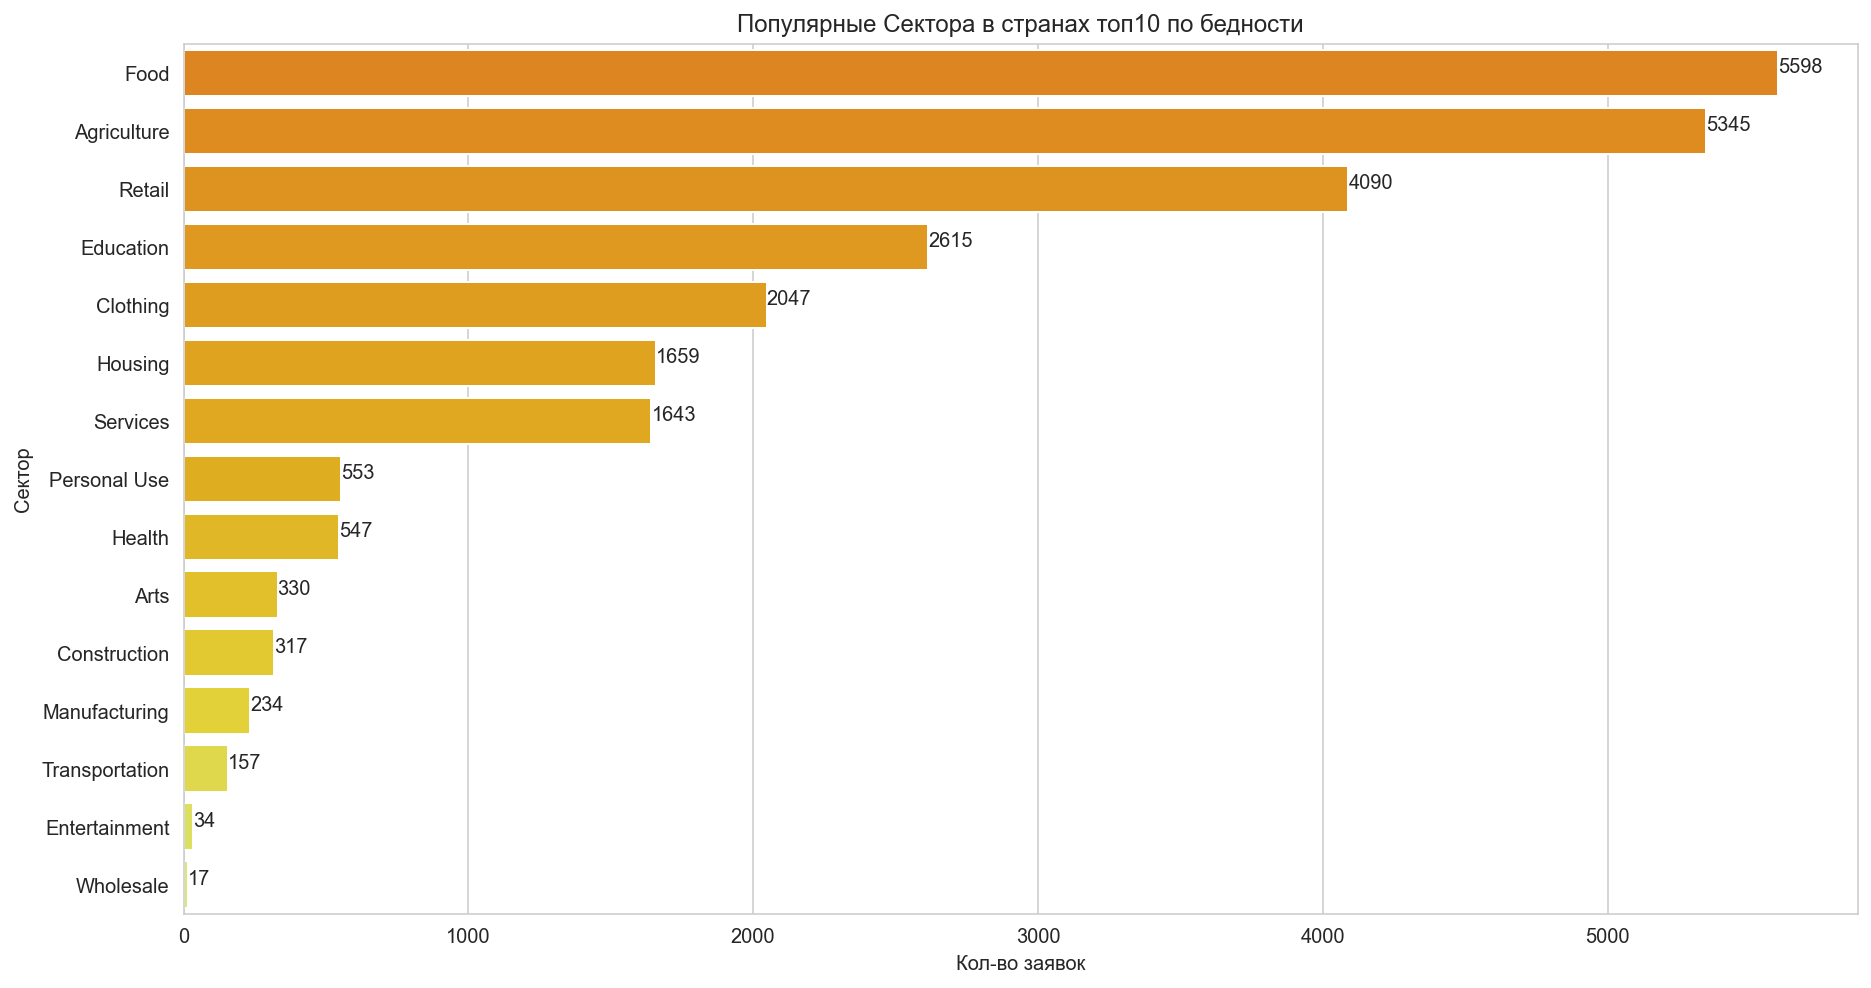

In [204]:
# отфильтруем самые бедные страны из топ10 по индеку бедности
# и сгруппируем по Сектору
con_poor_list= con_poor['country']
sector_poor = (df1.query('country in @con_poor_list')
  .groupby(['sector'], as_index=False)
  .agg({'id': 'count'})
  .sort_values(by='id', ascending=False)
)
sector_poor = sector_poor.rename(columns={'id':'count_id'})

# построим барплот
plt.figure(figsize=(15, 8))
sns.barplot(data = sector_poor, x='count_id', y='sector', palette='Wistia_r')
for y, x in enumerate(sector_poor['count_id']):
    plt.text(x, y, f'{x:.0f}', fontsize=10)
plt.title('Популярные Сектора в странах топ10 по бедности')
plt.xlabel('Кол-во заявок')
plt.ylabel('Сектор')
plt.show()

- Популярные Сектора в странах топ10 по бедности: Еда, Сельское хозяйство, Розничная торговля.

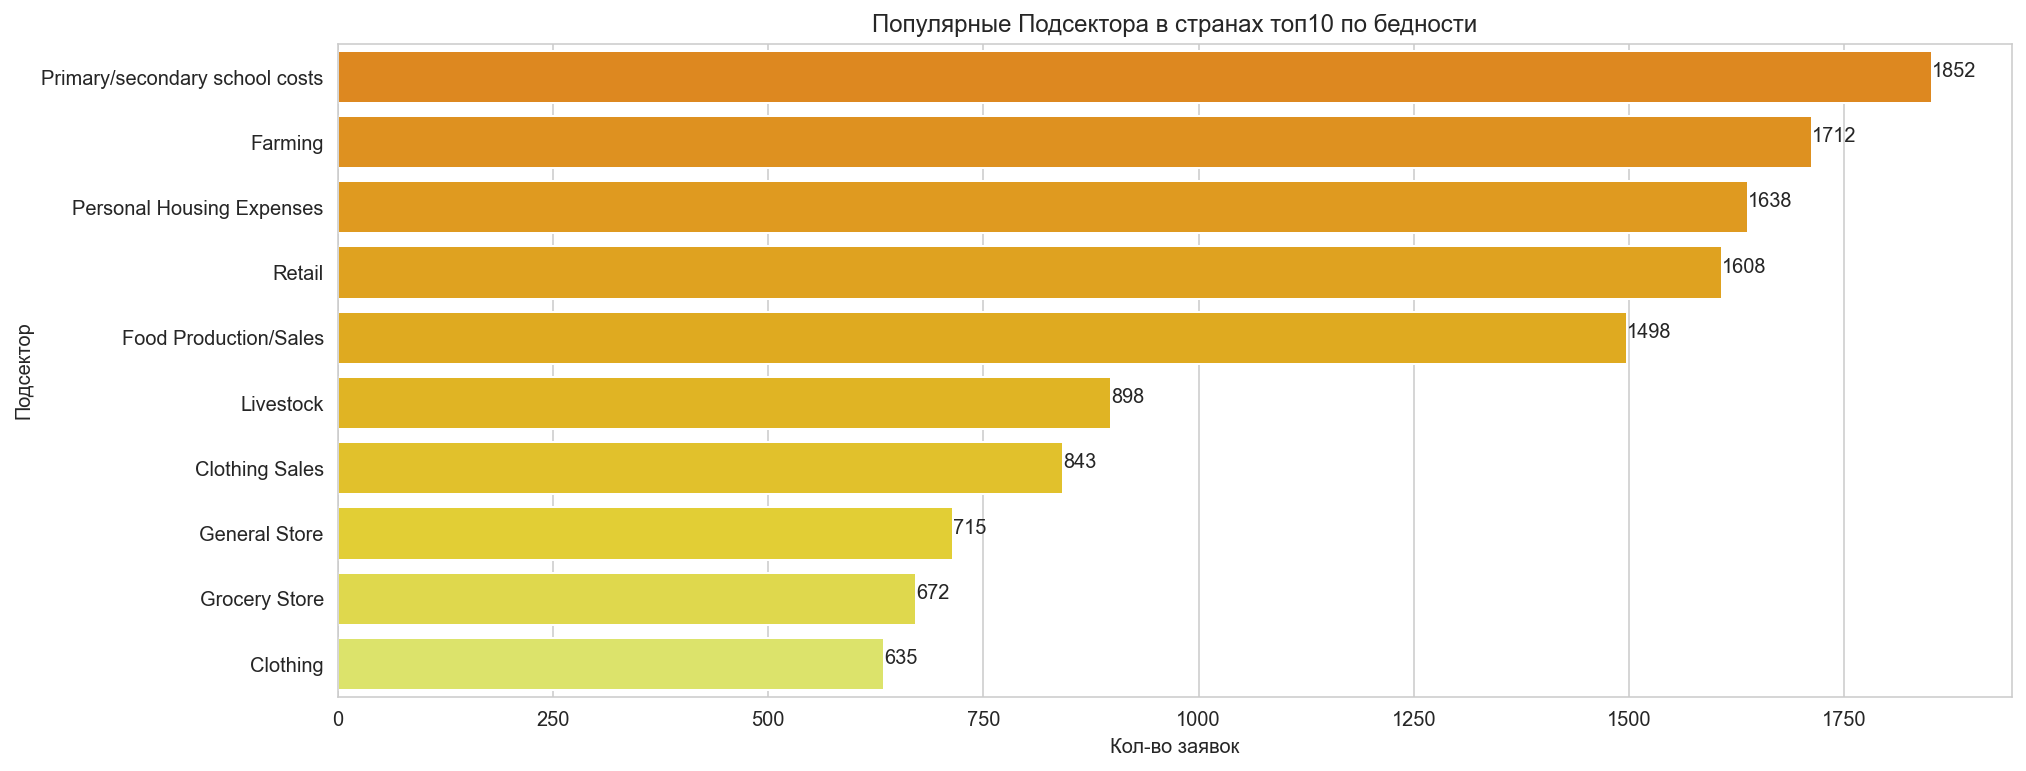

In [205]:
# отфильтруем самые бедные страны из топ10 по индеку бедности
# и сгруппируем по Сектору
con_poor_list= con_poor['country']
activity_poor = (df1.query('country in @con_poor_list')
  .groupby(['activity'], as_index=False)
  .agg({'id': 'count'})
  .sort_values(by='id', ascending=False)
  .head(10)
)
activity_poor = activity_poor.rename(columns={'id':'count_id'})

# построим барплот
plt.figure(figsize=(15, 6))
sns.barplot(data = activity_poor, x='count_id', y='activity', palette='Wistia_r')
for y, x in enumerate(activity_poor['count_id']):
    plt.text(x, y, f'{x:.0f}', fontsize=10)
plt.title('Популярные Подсектора в странах топ10 по бедности')
plt.xlabel('Кол-во заявок')
plt.ylabel('Подсектор')
plt.show()

- Популярные Подсектора в странах топ10 по бедности: Начальная/средняя школа, Сельское хозяйство, Личное жилье, Розничная торговл, Производство/продажа продуктов питания.

### 3.3 Остальное

#### 3.3.1 Доли заемщиков М/Ж

[237997, 1019210]


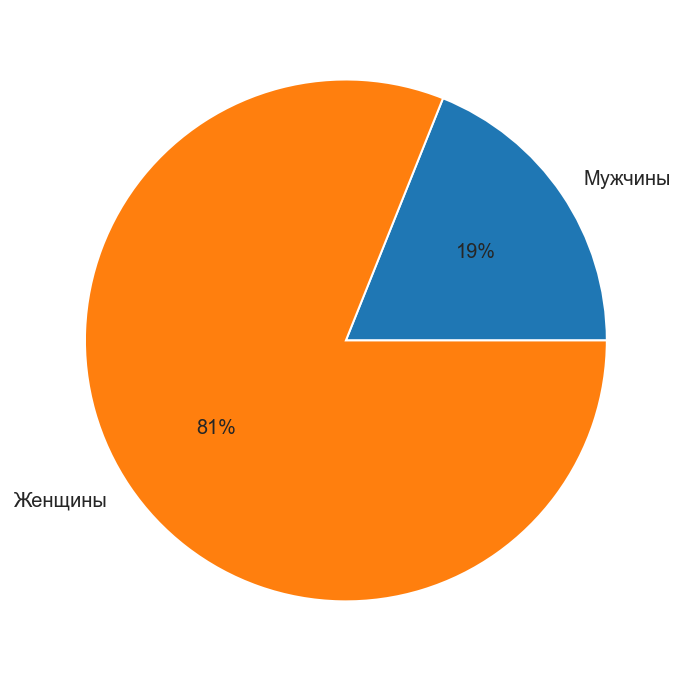

In [152]:
# посчитаем пол заемщиков кол-во мужчин и женщин
gender = [int(df1['male'].sum()), int(df1['female'].sum())]
print(gender)

plt.figure(figsize=(6,6))
labels = ['Мужчины', 'Женщины']
plt.pie(gender, labels = labels, autopct='%.0f%%')
plt.show()

* Пользуются сервисом и берут в кредит в основном Женщины (81%), Мужчины видимо ищут другие методы или работы 19%.

#### 3.3.2 Распределение женщин, женщин по Суб-регионам

In [58]:
# посчитаем доли женщин по каждой заявке в %
df1['female_share'] = df1['female'] / df1['male_female'] *100
df1.head(2)
(df1['female_share'].isna().sum() / len(df1) * 100)
# пропусков около 0.5% как и было в начале, это не страшно

0.5328981920328668

In [59]:
con_female_share = (df1
                    .groupby('country', as_index=False)
                    .agg({'sub_region_continent':'first',
                          'female_share':'mean',
                          'id': 'count',
                          'main_country_religion': 'first'})
                    .sort_values(by='female_share', ascending=False)
)
# добавим население
if 'population' in con_female_share.columns:
    pass
else:
    con_female_share = con_female_share.merge(population, on='country', how='left', right_index=False)

con_female_share.head(4)

,country,sub_region_continent,female_share,id,main_country_religion,population
0,Afghanistan,Asia,100.0,2,Muslims,32890171
1,Cote D'Ivoire,Sub-Saharan Africa,100.0,1,Christians,27970139
2,Turkey,Asia,100.0,1702,Muslims,85279553
3,Solomon Islands,Oceania,100.0,531,Christians,728041


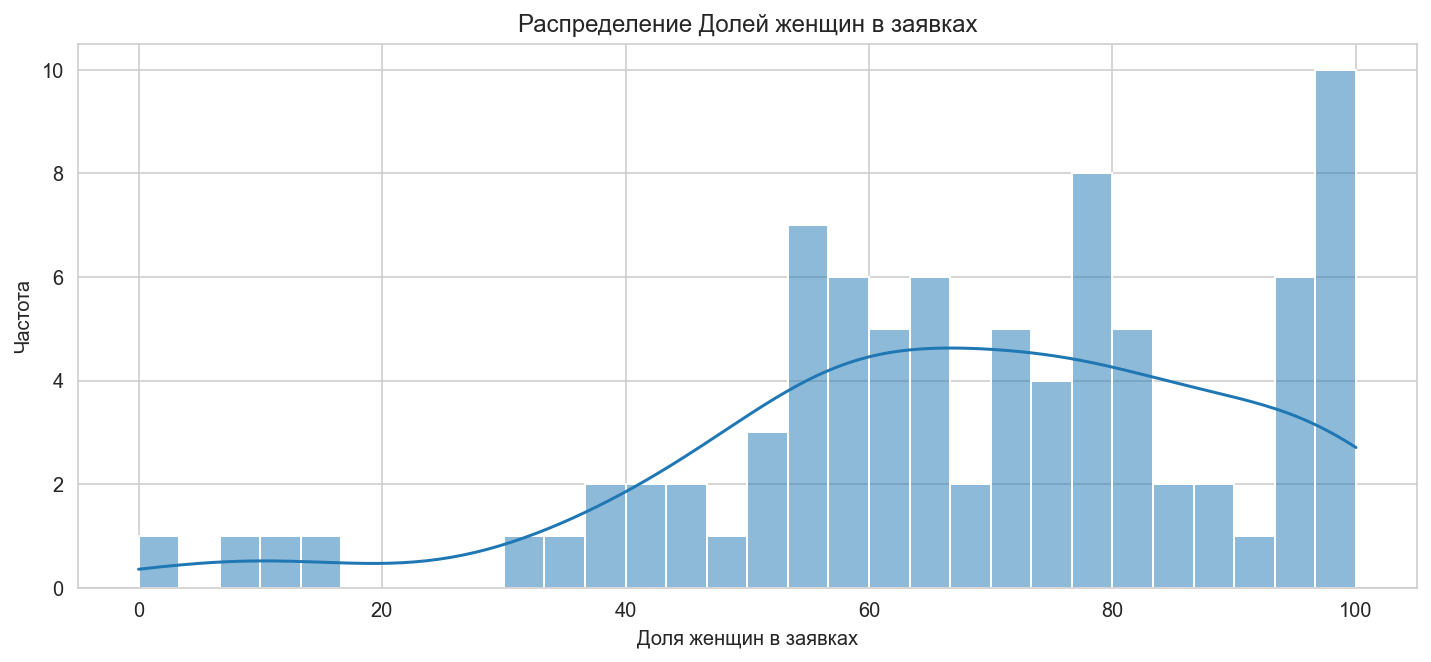

In [90]:
plt.figure(figsize=(12, 5))
sns.histplot(con_female_share, x = 'female_share', kde=True, bins = 30)
plt.xlabel('Доля женщин в заявках')
plt.ylabel('Частота')
plt.title('Распределение Долей женщин в заявках')
plt.show()

- Кол-во заявок в Турции -1702, а на Соломоновых островах -531, и все эти заявки 100% женские, удивительно. Возможно женщинам дают кредит охотнее, а также возможно мужчины предпочитают оформлять на женщин кредит чтобы в случае чего самому без проблем работать дальше.

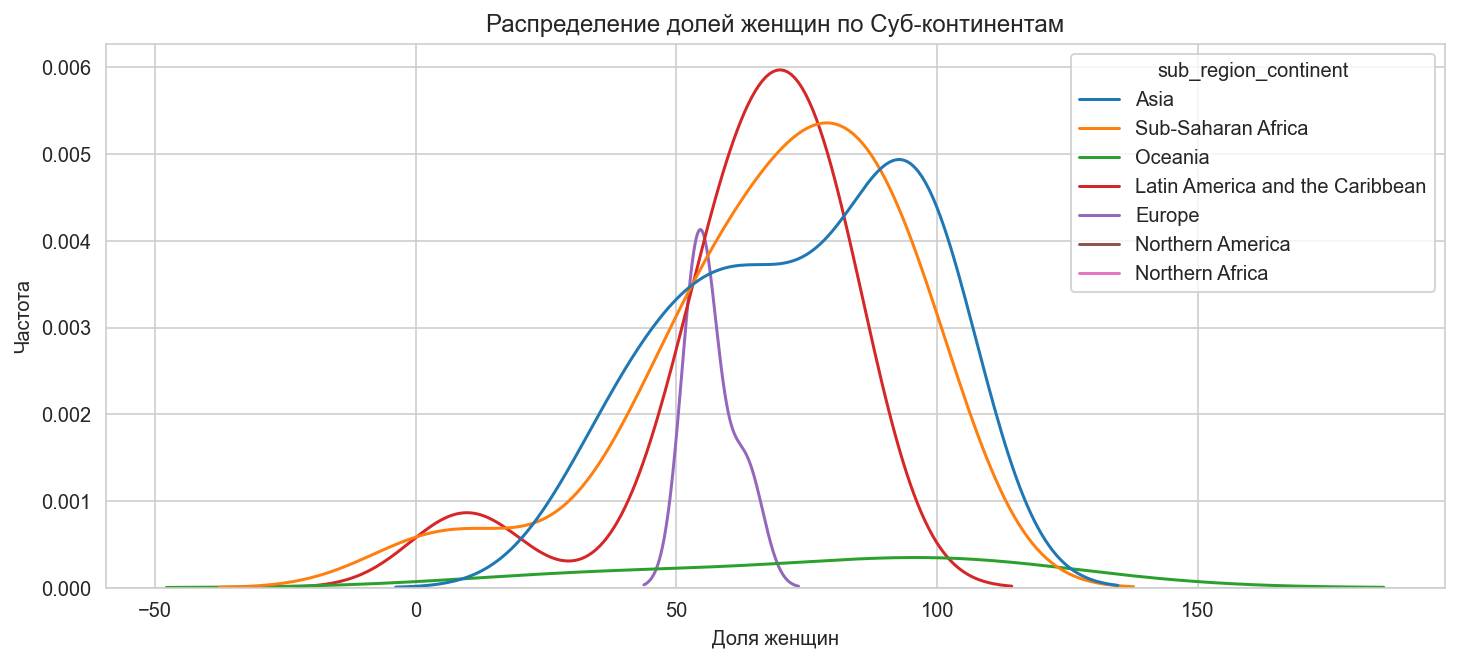

In [89]:
# построим график
plt.figure(figsize=(12, 5))
sns.kdeplot(data = con_female_share,
            x='female_share', hue='sub_region_continent')
plt.title('Распределение долей женщин по Суб-континентам')
plt.xlabel('Доля женщин')
plt.ylabel('Частота')
plt.show()

- По Суб-континентам доля женщин больше всего в Океании, Азии, Африке. В Европейских же бедных странах женских заявок ~60%.

#### 3.3.3 Доля женщин - Религия

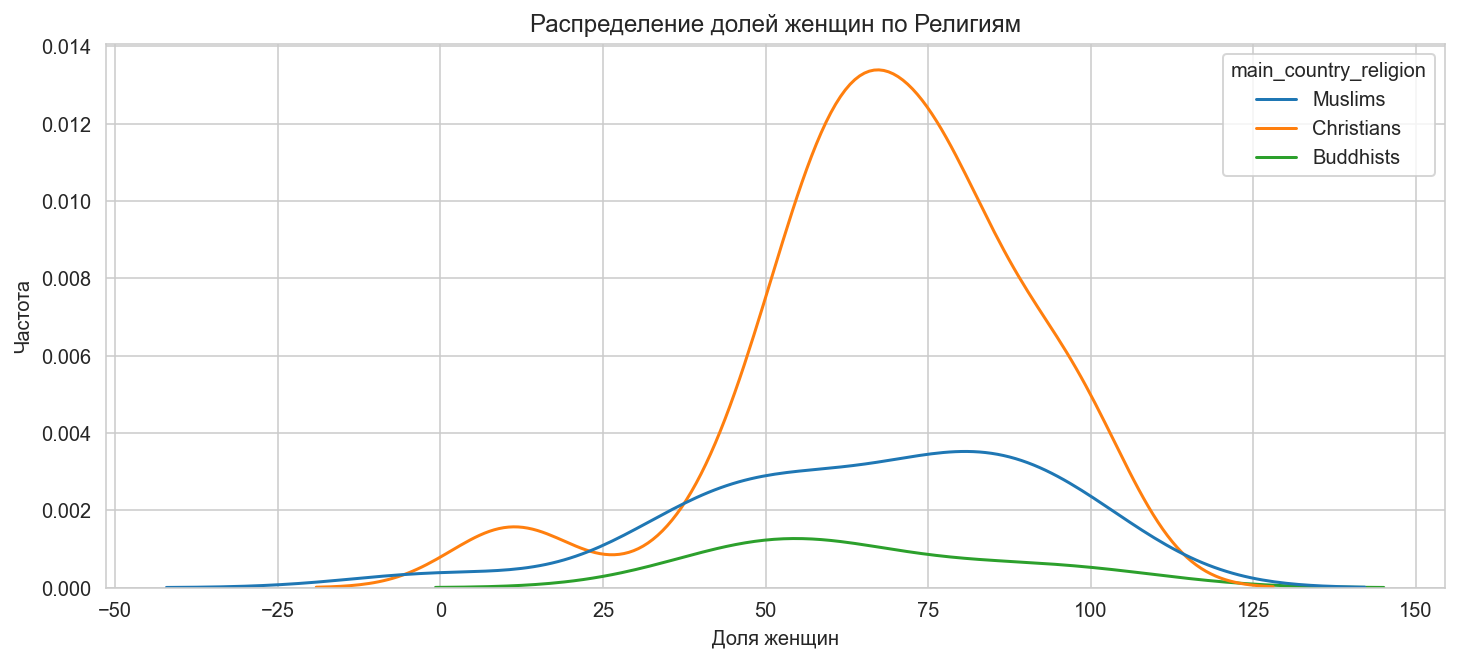

In [153]:
# уберем лишние религии чтобы не было каши
main_rel = ['Christians', 'Muslims', 'Buddhists']

plt.figure(figsize=(12, 5))
sns.kdeplot(data = con_female_share.query('main_country_religion in @main_rel'),
            x='female_share', hue='main_country_religion')
plt.title('Распределение долей женщин по Религиям')
plt.xlabel('Доля женщин')
plt.ylabel('Частота')
plt.show()

- Больше всего доля женщин среди Мусульман, у Буддистов доли почти поровну, а у Христин по большей части тоже женщины ~70% и по кол-ву их больше всего.

#### 3.3.4 Кол-во партнеров по Странам, Сумма кредитов и кол-во кредитов среди партнёров (partner_id)

На основе столбца partner_id изучим количество партнёров Kiva в разных странах; равномерность распределения сумм кредитов среди партнёров; частоту и объем случаев, когда партнеры выдают кредиты до полного финансирования

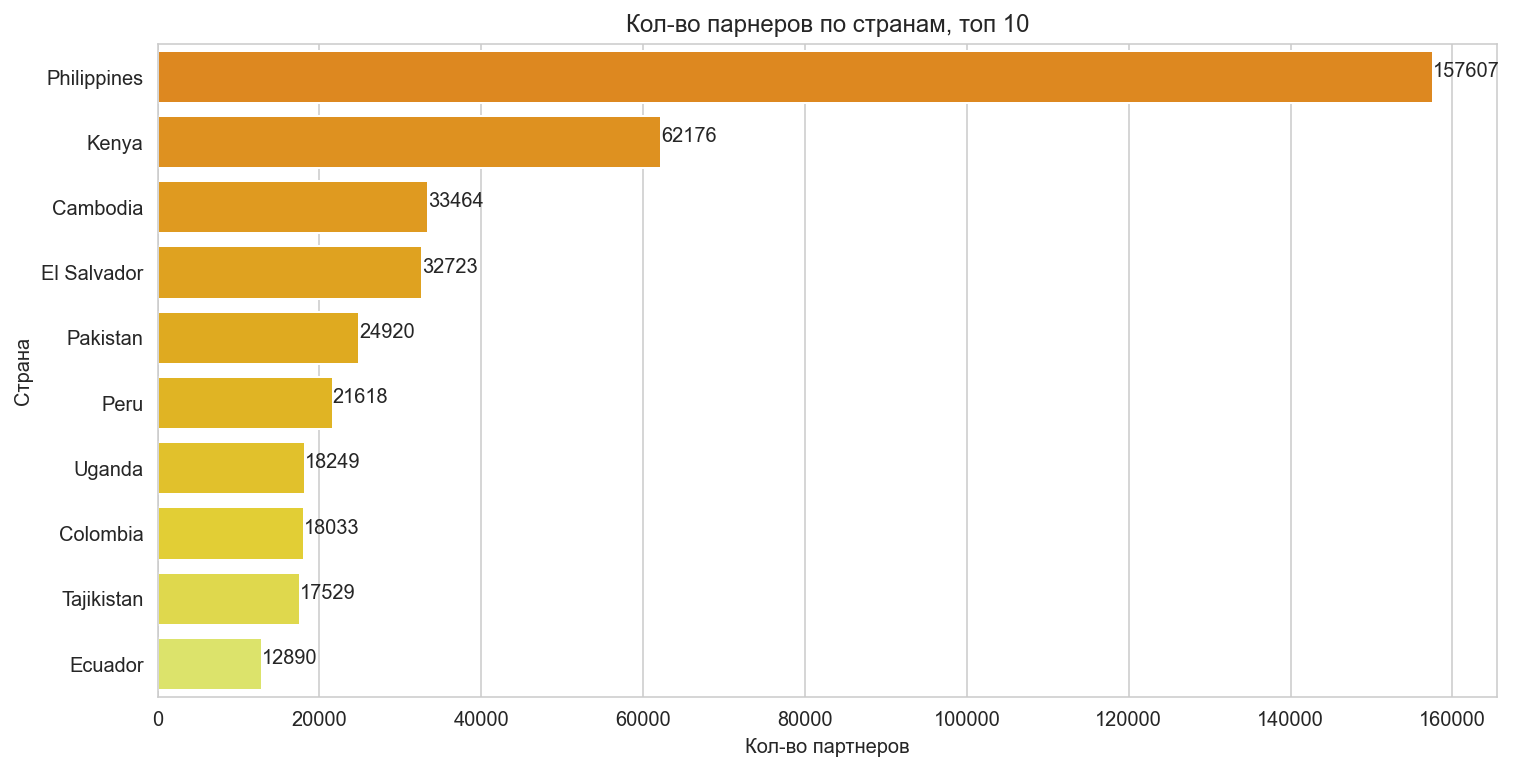

In [208]:
# и сгруппируем по Странам
con_partner = (df1
  .groupby(['country'], as_index=False)
  .agg({'partner_id': 'count'})
  .sort_values(by='partner_id', ascending=False)
  .head(10)
)
con_partner = con_partner.rename(columns={'partner_id':'count_partner_id'})

# построим барплот
plt.figure(figsize=(12, 6))
sns.barplot(data = con_partner, x='count_partner_id', y='country', palette='Wistia_r')
for y, x in enumerate(con_partner['count_partner_id']):
    plt.text(x, y, f'{x:.0f}', fontsize=10)
plt.title('Кол-во парнеров по странам, топ 10')
plt.xlabel('Кол-во партнеров')
plt.ylabel('Страна')
plt.show()

- Там где больше всего партнетов, там не сильно бедные страны. Наибольшее кол-во партнеров в Филиппинах и Кении, но эти страны не сильно бедные.

In [64]:
# сгруппируем по Партнерам, посчитаем топ партнеров по сумме кредитов и по кол-ву
partner = (df1.groupby('partner_id')
  .agg({'funded_amount': ['sum','count'],
        'sub_region_continent':'first'})
)
partner.rename(columns ={'sum':'funded_amount_sum',
                         'count':'funded_amount_count'}, inplace=True)
partner.columns = partner.columns.droplevel(0)
partner.rename(columns={'first':'sub_region_continent'}, inplace=True)
partner = partner.sort_values(by='funded_amount_sum', ascending=False)
partner.head(3)

,funded_amount_sum,funded_amount_count,sub_region_continent
partner_id,,,
145.0,33811000.0,106004,Asia
58.0,29131700.0,11580,Latin America and the Caribbean
119.0,16906650.0,9811,Latin America and the Caribbean


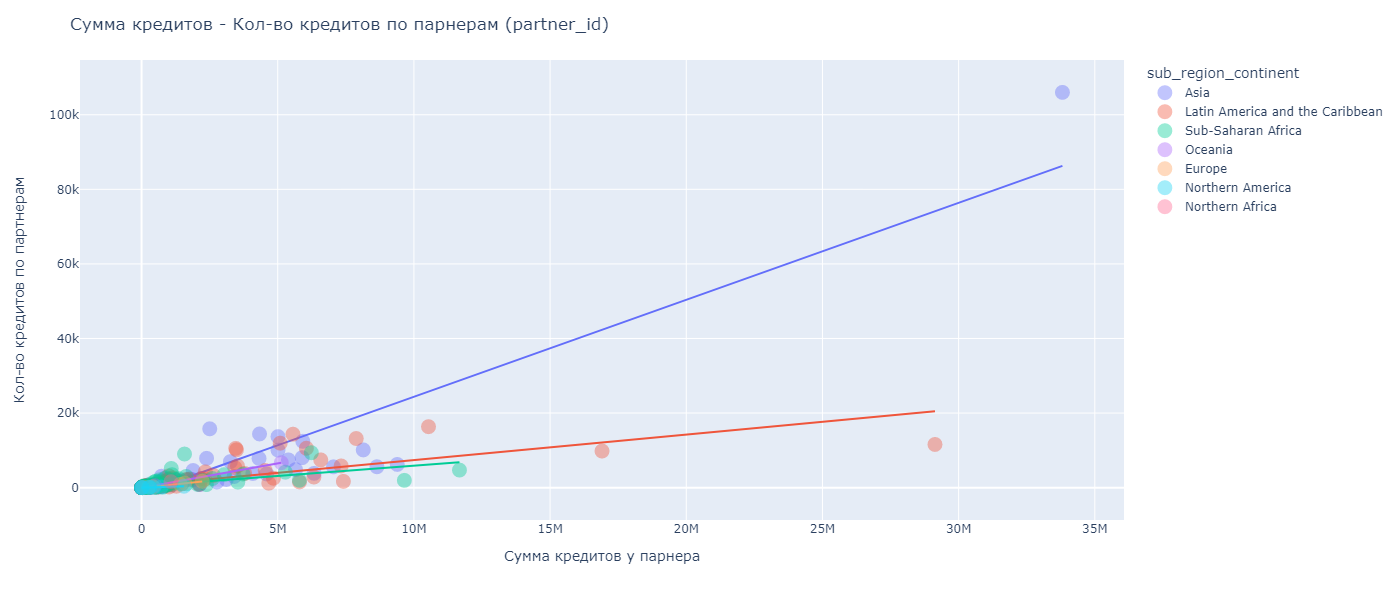

In [65]:
# строим plotly scatter
fig = px.scatter(partner,
                 x='funded_amount_sum',
                 y='funded_amount_count',
                 #size='population',
                 color='sub_region_continent',
                 hover_name=partner.index,
                 #hover_data=['country', 'count_id_sector'], # дает доп инфу
                 size_max=30,
                 opacity=0.4,
                 trendline='ols',
                 width=1400, height=600
                 )
# добавляем надписи
fig.update_layout(title='Сумма кредитов - Кол-во кредитов по парнерам (partner_id)',
                   xaxis_title='Сумма кредитов у парнера',
                   yaxis_title='Кол-во кредитов по партнерам')
fig.update_traces(marker_size=15)



- В Азии Партнеры как правило выдают суммы кредитов меньше чем в среднем, а в Латинской Америке и Африке больше суммы кредитов на меньшее кол-во кредитов.

#### 3.3.5 Частота и объем случаев, когда партнеры выдают кредиты до полного финансирования

Партнеры выдают кредиты до полного финансирования в случае, когда они доверяют заемщику, критерии:
* disbursed_time (время выплаты) < funded_time(время завершения сбора средств)
* funded_amount = loan_amount (это мы определили в п.2.1, и удалили loan_amount)

In [66]:
# отберем заявки
df_trust = df1.query('disbursed_time < funded_time')
# посчитаем какой процент остался
round((100- (len(df1) - len(df_trust)) / len(df1) *100), 1)

95.4

- Партнеры выдают кредиты до полного финансирования в 95% всех случаев (в выборке только исполненные заявки), партнеры достаточно сильно доверяют заемщикам или как то их выбирают.

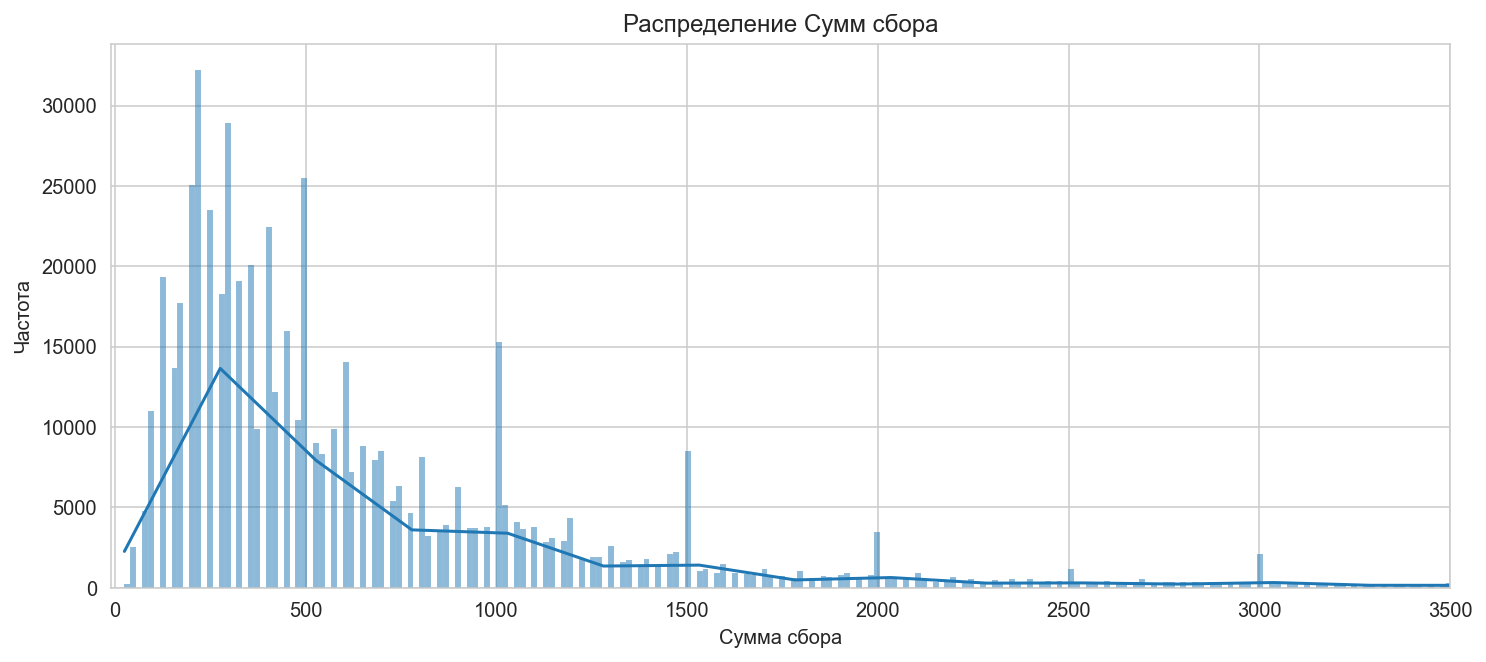

In [156]:
# Распределение Сумм сбора
plt.figure(figsize=(12, 5))
sns.histplot(data = df_trust, x = 'funded_amount', kde=True) #, bins = 30
plt.xlim(-10,3500)
plt.xlabel('Сумма сбора')
plt.ylabel('Частота')
plt.title('Распределение Сумм сбора')
plt.show()

* По распределению сумм сбора: пик ~250 долларов, как правило это сумма от 0 до 1000 долларов, отчетливо видны пики с шагом 500 долларов (людям так проще оценить).

In [68]:
# посмотрим суммы сбора в динамике по времени, сгруппируем по месяцам
df_trust['disbursed_time_month'] = df_trust['disbursed_time'].dt.to_period('M').dt.to_timestamp().dt.date
# сгруппируем по месяцам, посмотрим суммы сбора
df_trust2 = df_trust.groupby('disbursed_time_month', as_index=False)['funded_amount'].sum()
df_trust2 = df_trust2.rename(columns = {'funded_amount': 'funded_amount_sum'})
df_trust2.head(1)

,disbursed_time_month,funded_amount_sum
0,2013-12-01,5012200.0


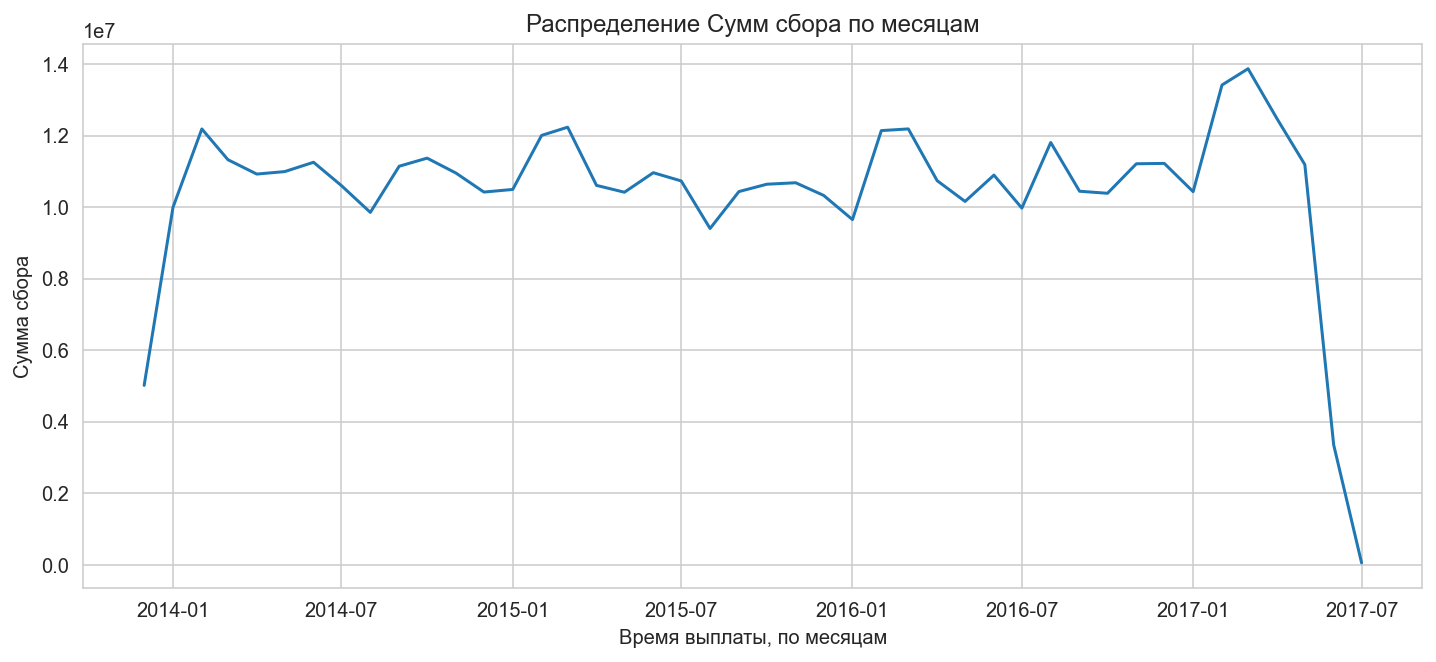

In [157]:
# Распределение Сумм сбора по времени выплаты (disbursed_time)
plt.figure(figsize=(12, 5))
sns.lineplot(data = df_trust2, x = 'disbursed_time_month', y ='funded_amount_sum') #, kde=True, bins = 30
plt.xlabel('Время выплаты, по месяцам')
plt.ylabel('Сумма сбора')
plt.title('Распределение Сумм сбора по месяцам')
plt.show()

* В целом объем кредитов с 2014 по 2017 по месяцам +- примерно такой же, стагнация, остается в диапазоне 10-12млн.долларов (если отбросить крайние неполные месяцы), в начале 2017 есть небольшой рост.

#### 3.3.6  Общие цифры

In [70]:
# С какой периодичностью выдают кредиты?
print(f'С какой периодичностью выдают кредиты? (минуты) {round(((df1.disbursed_time.max() - df1.disbursed_time.min()) / len(df1)).total_seconds() / 60, 1)}')
# Средяя сумма кредита
print(f'Средяя сумма кредита: {round(df1.funded_amount.mean())}')
# Сумма всех выданых кредитов
print(f'Сумма всех выданых кредитов: {round(df1.funded_amount.sum())}')

С какой периодичностью выдают кредиты? (минуты) 3.2
Средяя сумма кредита: 798
Сумма всех выданых кредитов: 497072875


#### 3.3.7  Облако тегов

,0,1
0,user_favorite,335810
1,parent,211243
2,woman_owned_biz,190980
3,repeat_borrower,98118
4,elderly,71717
5,animals,59423
6,schooling,56610
7,vegan,46984
8,eco-friendly,43596
9,biz_durable_asset,39599


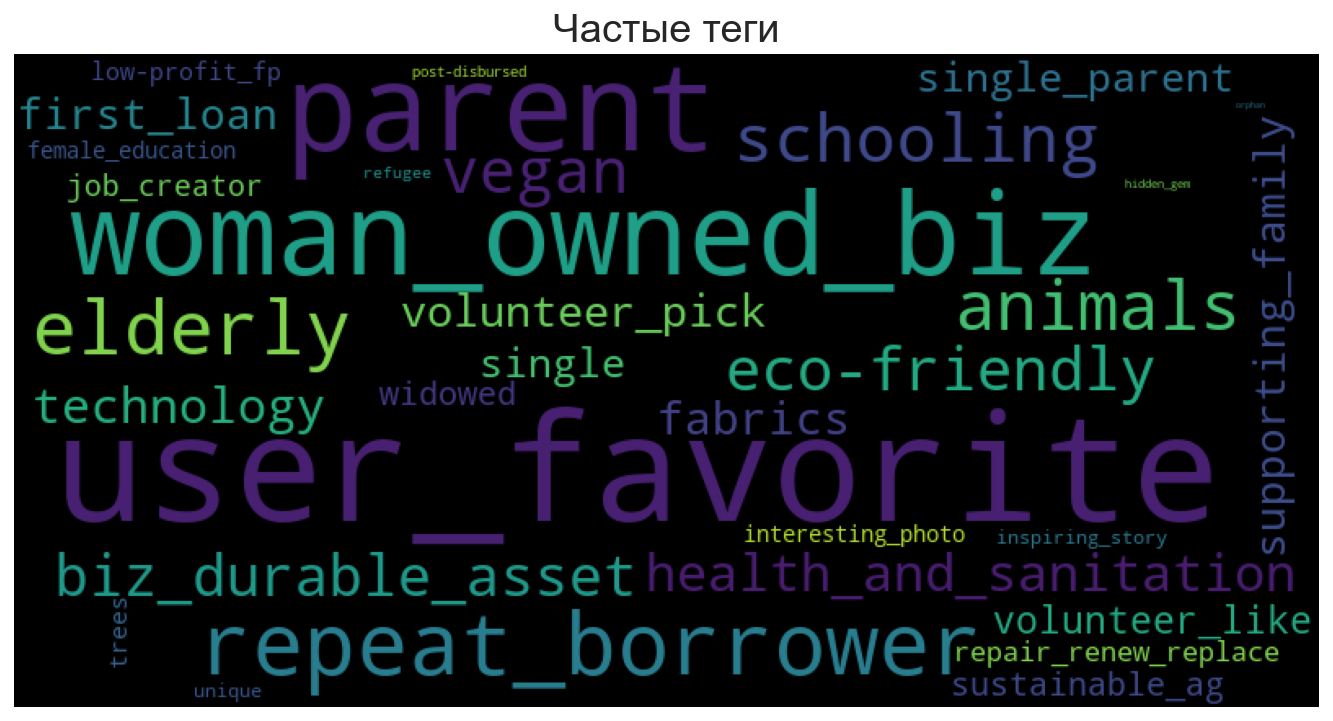

In [168]:
# Объединение тегов в одну строку, обработка
all_tags = ' '.join(df1['tags']
                    .dropna()
                    .str.replace('#', '')
                    .str.replace(', ', ',')
                    .str.replace(' ', '_')
                    .str.replace(',', ' ')
                    .str.lower()
                    )

# Подсчет частоты встречаемости слов {слово: кол-во}
word_counts = Counter(all_tags.split())

display(pd.DataFrame(word_counts.most_common(10)))

# Создание облака слов, генерация из словарика word_counts
wordcloud = WordCloud(width=800,
                      height=400,
                      #font_path="./arial.ttf",
                      stopwords=None,
                      random_state=42).generate_from_frequencies(word_counts)

# Отображение облака слов
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.title('Частые теги', fontsize=20)
plt.axis('off')
plt.show()

Из тегов популярны: user_favorite (избранное_пользователем), parent (родитель), woman_owned_biz (женщина_владеющая_бизнесом).

## **4. Проверка статистических гипотез**

### 4.1 Функции для проверки статистических гипотез

In [169]:
def test_normal(sample):
    """
    Гистограмма + тест Шапиро-Уилка на нормальное распределение
    H0 гипотеза что данные распределены нормально при p > 0,05
    """
    # проверим на нормальность распределение средних
    plt.figure(figsize=(12, 5))
    sns.histplot(sample)
    plt.show()

    alpha = 0.05
    results = st.shapiro(sample)
    p_value = results[1]
    print(f'Размер выборки: {len(sample)}')
    if p_value < alpha:
        print(f'p-value: {(p_value):.3f}, Данные распределены - Не нормально (нужен тест критерий Манна-Уитни)')
    else:
        print(f'p-value: {(p_value):.3f}, Данные распределены - нормально (нужен t-критерий/t-test Стьюдента)')

In [73]:
def mw(sample1,sample2):
    '''
    Функция для теста Манна-Уитни mannwhitneyu
    На вход подаем: дф1, дф2
    '''
    # отфильтруем две выборки
    sample1_f = sample1.dropna()
    sample2_f = sample2.dropna()

    print(f'Тест критерий Манна-Уитни:')
    print(f'Размер выборок без пропусков sample1, sample2: {len(sample1_f)}, {len(sample2_f)}')
    print(f'Среднее значение sample1: {(sample1_f.mean().values[0]):.3f}')
    print(f'Среднее значение sample2: {(sample2_f.mean().values[0]):.3f}')

    # Выполнение критерия Манна-Уитни
    statistic, p_value = mannwhitneyu(sample1_f,
                                      sample2_f,
                                      use_continuity=False # разные дисперсии
                                     )
    # уровень статистической значимости
    alpha = 0.05
    # вывод значений p-value
    print(f'p-value: {p_value.item():.3f}')

    # проверка нулевой гипотезы:
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print('Не получилось отвергнуть нулевую гипотезу: вывод о статистическом различии сделать нельзя')

In [74]:
def ttest(sample1,sample2):
    '''
    Функция для t-критерий/t-test Стьюдента
    На вход подаем: дф1, дф2
    '''
    # отфильтруем две выборки
    sample1_f = sample1.dropna()
    sample2_f = sample2.dropna()

    print(f'Тест t-критерий Стьюдента:')
    print(f'Размер выборок без пропусков sample1, sample2: {len(sample1_f)}, {len(sample2_f)}')
    print(f'Среднее значение sample1: {(sample1_f.mean().values[0]):.3f}')
    print(f'Среднее значение sample2: {(sample2_f.mean().values[0]):.3f}')

    # выполнение t-test Стьюдента
    result = st.ttest_ind(sample1_f,
                          sample2_f,
                          equal_var=False) # t-критерий Уэлча, разные дисперсии
    # уровень статистической значимости
    alpha = 0.05
    # вывод значений p-value
    print(f'p-value: {result.pvalue.item():.3f}')

    # проверка нулевой гипотезы:
    if result.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print('Не получилось отвергнуть нулевую гипотезу: вывод о статистическом различии сделать нельзя')

### 4.2 Гипотеза 1

```
Зададим гипотезы:
H_0 (нулевая гипотеза): Нет различий между средними сроками сбора средств для займов женщин(100% доля) vs всех остальных
H_A (альтер-ая гипотеза): Есть различия между средними сроками сбора средств для займов женщин(100% доля) vs всех остальных
alpha = 0.05 (Исходный уровень статистической значимости)
```

In [75]:
sample1_g1 = df1.query('female_share == 100')[['time_collect']].sample(5000)
sample2_g1 = df1.query('female_share != 100')[['time_collect']].sample(5000)

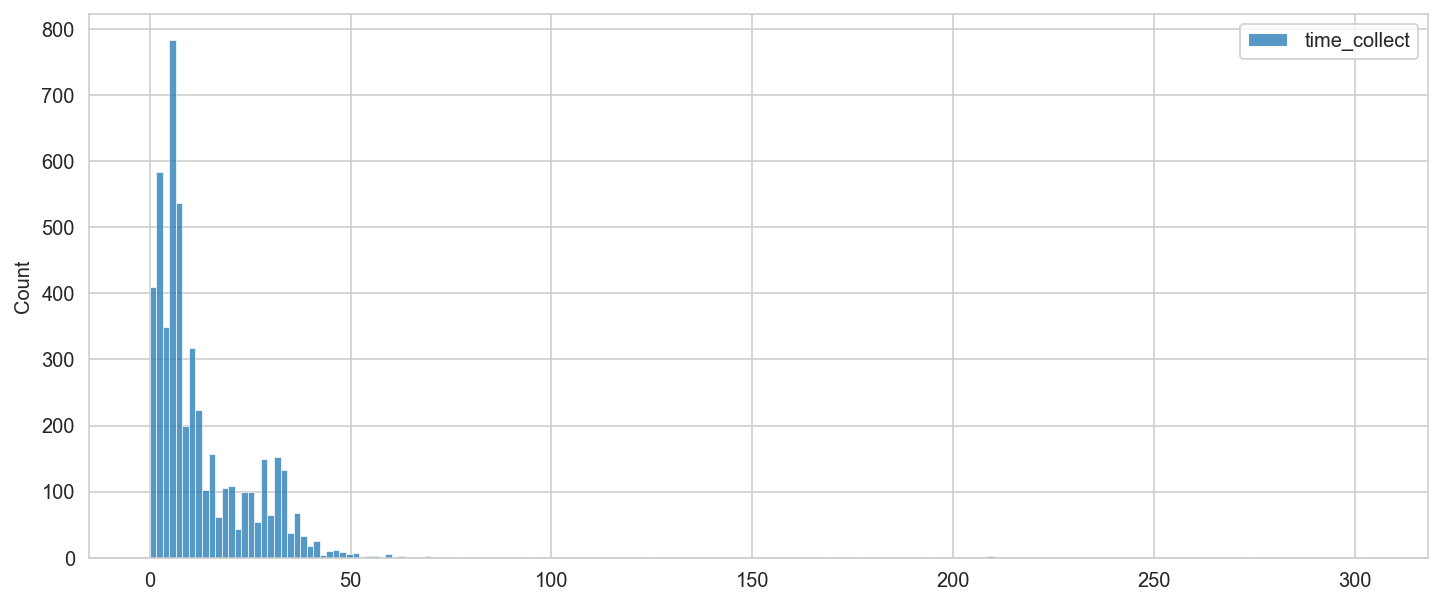

Размер выборки: 5000
p-value: 0.000, Данные распределены - Не нормально (нужен тест критерий Манна-Уитни)


In [170]:
test_normal(sample1_g1)

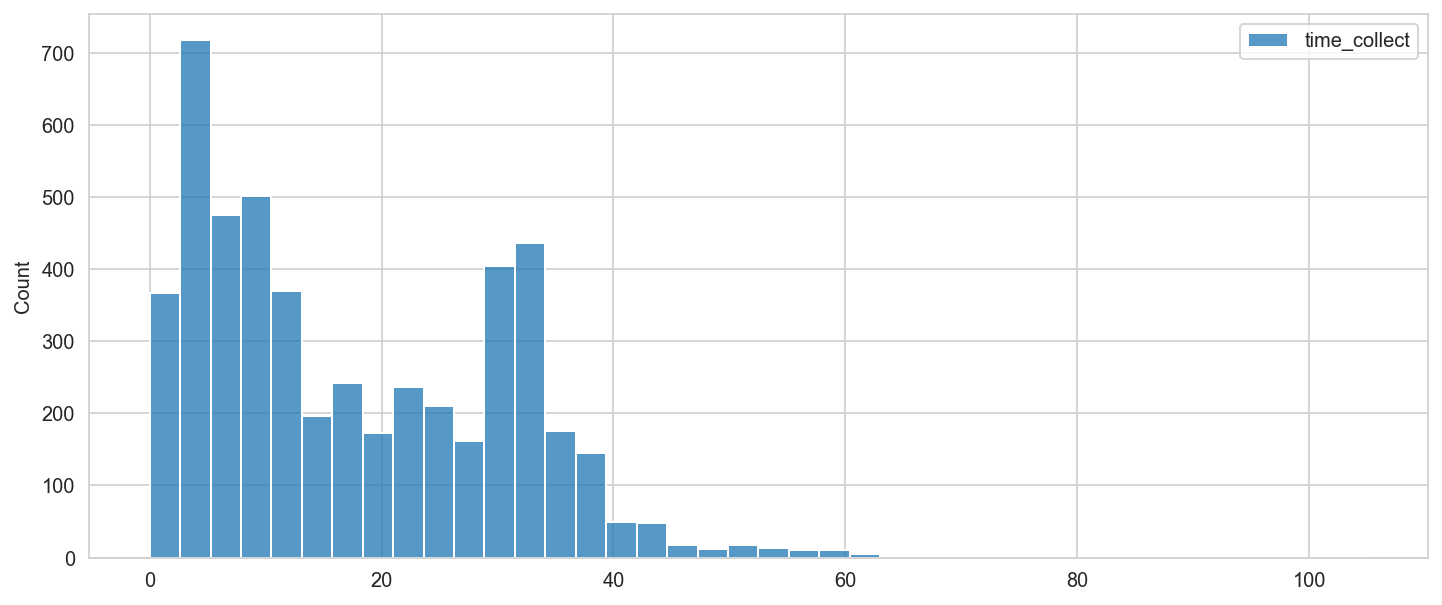

Размер выборки: 5000
p-value: 0.000, Данные распределены - Не нормально (нужен тест критерий Манна-Уитни)


In [171]:
test_normal(sample2_g1)

In [78]:
mw(sample1_g1,
  sample2_g1)

Тест критерий Манна-Уитни:
Размер выборок без пропусков sample1, sample2: 5000, 5000
Среднее значение sample1: 12.927
Среднее значение sample2: 17.521
p-value: 0.000
Отвергаем нулевую гипотезу: разница статистически значима


На имеющихся данных есть основания отвергнуть нулевую гипотезу о равенстве средних сроков сбора средств для (займов женщин(100% доля) vs всех остальных) в пользу альтернативных гипотез. Вывод: средние сроки сбора средств для займов женщин vs всех остальных различаются с статистической точки зрения. Тоесть женщины на самом деле собирают заемные средства быстрее.

### 4.3 Гипотеза 2

```
Зададим гипотезы:
H_0 (нулевая гипотеза): Нет различий между средними суммами сбора средств для женщин(100% доля) vs всех остальных
H_A (альтер-ая гипотеза): Есть различия между средними суммами сбора средств для женщин(100% доля) vs всех остальных
alpha = 0.05 (Исходный уровень статистической значимости)
```

In [79]:
sample1_g2 = df1.query('female_share == 100')[['funded_amount']].sample(5000)
sample2_g2 = df1.query('female_share != 100')[['funded_amount']].sample(5000)

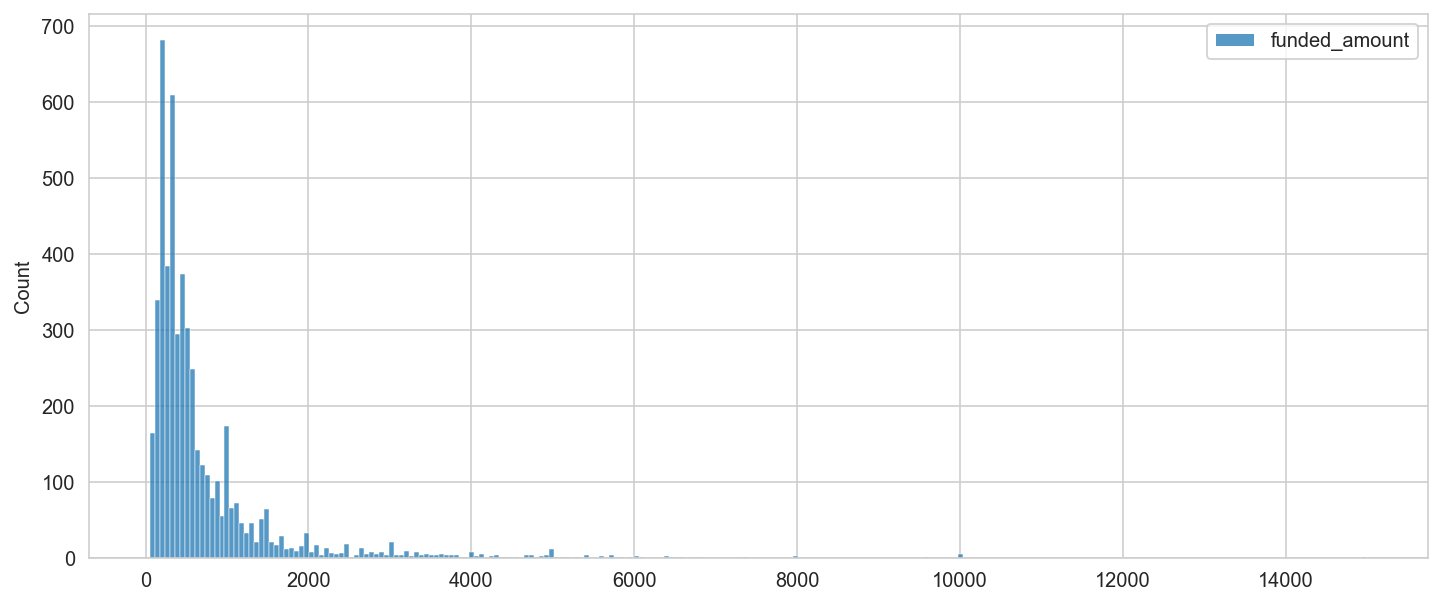

Размер выборки: 5000
p-value: 0.000, Данные распределены - Не нормально (нужен тест критерий Манна-Уитни)


In [172]:
test_normal(sample1_g2)

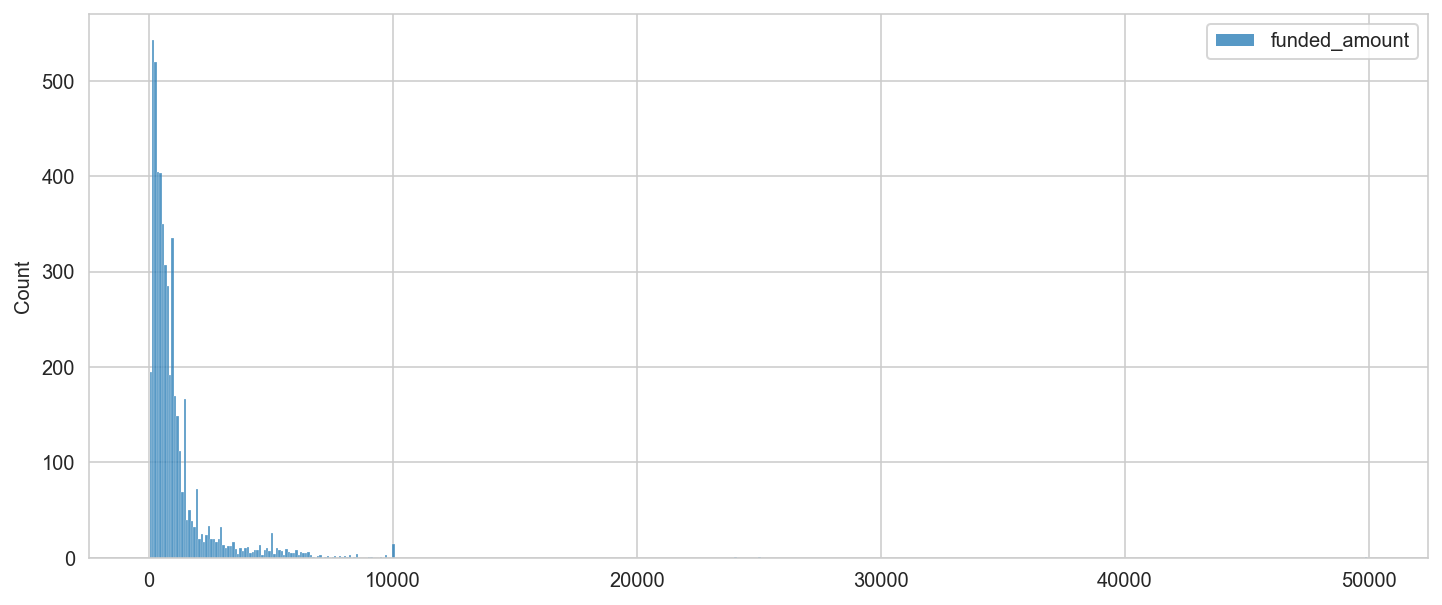

Размер выборки: 5000
p-value: 0.000, Данные распределены - Не нормально (нужен тест критерий Манна-Уитни)


In [173]:
test_normal(sample2_g2)

In [82]:
mw(sample1_g2,
  sample2_g2)

Тест критерий Манна-Уитни:
Размер выборок без пропусков sample1, sample2: 5000, 5000
Среднее значение sample1: 696.875
Среднее значение sample2: 1077.675
p-value: 0.000
Отвергаем нулевую гипотезу: разница статистически значима


На имеющихся данных есть основания отвергнуть нулевую гипотезу о равенстве между средними суммами сбора средств для женщин(100% доля) vs всех остальных в пользу альтернативных гипотез. Вывод: средние средними суммами сбора средств для женщин(100% доля) для займов женщин vs всех остальных различаются с статистической точки зрения. Не смотря на то что женщин много и они быстрее собирают, у них сумма сбора обычно меньше.

## **5. Выводы**

* Kiva c 2013.12 по 2017.07 осчастливила 622тыс.человек, в среднем это выдача 798 долларов каждые 3,2 минуты!
* Сумма всех выданых кредитов в 85 стран за этот период 497млн.долларов.

1. **Скорость анализа сбора средств и зависимость от показателей:**
    - Медианное время сбора средств - 9 дней, следующий наиболее частый пик это 1 месяц (30-31 дней)
    - Корелляции между суммы сбора от времени сбора - нет. Но есть скученность заявок от 0 до 10 000 долларов. Время сбора в зависимости от суммы может быть как больше так и меньше.

    По Секторам:
    - Топ популярных секторов: Агрокультура, Еда, Ритейл, среди них:
    - Самый быстрый сбор средств у секторов производства, искусства, образования.
    - Самый медленный сбор средств у секторов одежды, транспорта, строительства.

    По подсекторам:
    - Самый быстрый сбор у подсекторов: еда, шитье, велосипеды, медицина.
    - Самый медленный сбор у подсекторов: садоводство, технологические гаджеты, энергетика, уборка.
    - Есть 1 партнер у которого больше 100 000 заявок, ого, и у него скорость сбора примерно 9дней.

    По странам:
    - Самый быстрый сбор средству стран: Афганистан (2 заявки), Мауритания, Непал. Как правило это бедные страны, и страны где малое кол-во заявок было.
    - Самый медленый сбор средств у стран: США, Пуэрто Рико, Вануату. Это страны не бедные, более скурпулезно проверяют людей видимо.

    По суб-континентам:
    - Большинство заявок с Азии, Латинской Америки и Южной Африки
    - Северная Африка, Азия, Южная Африка (от Сахары) страны бедные, люди более охотнее кредитуют таких.
    - Северная Америка не является бедной страной, поэтому среднее Время сбора средств высокое, больше разбирательств и недоверия к заявителям.

    По типам Регулярности выплат:
    - monthly -ежемесячно самое популярное топ1, логично что ЗП 1 раз в месяц у большинсва людей
    - irregular - нерегулярно, топ2, многие бедняки не знают когда у них получиться выплатить и кредиторы входят в положение

    По религиям:
    - Больше всего заявок от Христиан, кредиторы скорее всего тоже христиане.
    - Быстрее всего дают кредит Буддистам, на втором месте Христиане. Мусульманам дольше всего собирают кредит.


2. **Анализ заявок и индекса бедности:**

    По странам:
    - Страны очень бедные, но где не представлена Kiva соовем **(рекомендация обратить Kiva внимание на них и поработать там)**: Нигер, Чад, Центральноафриканская Республика.
    - Самые бедные страны где представлена Kiva - Южный судан, Ливан, Буркина Фасо, Сомали. Все эти страны в Африке, Ливан на стыке Африка-Азия.
    - В индексе MPI только бедные страны 111шт, поэтому нельзя сказать что страны у которых показатель близок к 0 - богатые.
    https://hdr.undp.org/content/2022-global-multidimensional-poverty-index-mpi#/indicies/MPI

    По кол-ву заявок на страны:
    - Самые активные страны в пересчете на 100тыс.человек: Suriname, Samoa. Это Латинская америка, и Океания. Далековато от бедных стран Африки. Наверное сказывается близость к месту где была основана Kiva -запад США (Сан-Франциско) и наличие техники/не такая бедность.
    - Наименьшее кол-во заявок в пересчете на 100тыс.человек: Cove D'Ivoire, Afganistan, Mauritania, Chilie. В основном это Африка, Азия, бедные страны.
    - У стран Африки очень высокая бедность и очень мало заявок на 100тыс.человек, там Kiva явно недостаточно представлена.
    - В разрезе по годам(2014-2016, 2017 не полный) можно сказать что у части стран Азии кол-во заявок растет.
    
    По секторам:
    - При высоком идексе бедности популярны сектора: Розничная торговля(Retail 25%), Сельское хозяйство (Agriculture 24%) Еда (Food 22%).
    - При низком уровне бедности популярны сектора: Еда (Food 23%),  Сельское хозяйство (Agriculture 19%), Розничная торговля(Retail 19%). Но в меньшем процентном соотношении. Теже сектора, но доля первоочередных сектором пониже.

    Популярные Сектора и Подсектора в странах топ10 по бедности:
    - Популярные Сектора в странах топ10 по бедности: Еда, Сельское хозяйство, Розничная торговля.
    - Популярные Подсектора в странах топ10 по бедности: Начальная/средняя школа, Сельское хозяйство, Личное жилье, Розничная торговл, Производство/продажа продуктов питания.
           
    Из тегов популярны: user_favorite (избранное_пользователем), parent (родитель), woman_owned_biz (женщина_владеющая_бизнесом).

3. **Общее EDA:**

    По гендерному признаку:
    - Пользуются сервисом и берут в кредит в основном Женщины (81%), Мужчины видимо ищут другие методы или работы 19%.
    - Кол-во заявок в Турции -1702, а на Соломоновых островах -531, и все эти заявки 100% женские, удивительно. Возможно женщинам дают кредит охотнее, а также возможно мужчины предпочитают оформлять на женщин кредит чтобы в случае чего самому без проблем работать дальше.
    - По Суб-континентам доля женщин больше всего в Океании, Азии, Африке. В Европейских же бедных странах женщских заявок ~60%.
    
    По доле женщин в религии:
    - Больше всего доля женщин среди Мусульман, у Буддистов доли почти поровну, а у Христин по большей части тоже женщины ~70% и по кол-ву их больше всего.

    По странам суммам кредитов, объем:
    - Там где больше всего партнетов, там не сильно бедные страны. Наибольшее кол-во партнеров в Филиппинах и Кении, но эти страны не сильно бедные.
    - В Азии Партнеры как правило выдают суммы кредитов меньше чем в среднем, а в Латинской Америке и Африке больше суммы кредитов на меньшее кол-во кредитов.
    - Партнеры выдают кредиты до полного финансирования в 95% всех случаев (в выборке только исполненные заявки), партнеры достаточно сильно доверяют заемщикам или как то их выбирают.
    - В целом объем кредитов с 2014 по 2017 по месяцам +- примерно такой же, стагнация, остается в диапазоне 10-12млн.долларов (если отбросить крайние неполные месяцы), в начале 2017 есть небольшой рост.
4. **Выводы по гипотезам:**
    - По гипотезе 1 вывод: женщины на самом деле собирают заемные средства быстрее.
    - По гипотезе 2 вывод: не смотря на то что женщин много и они быстрее собирают, у них сумма сбора обычно меньше.